In [22]:
import pandas as pd
from ast import literal_eval

pitch_symbol = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

df = pd.read_csv("songs.csv")
# ignore songs that have no tags
df = df[df["tags"].notna()]

# turn tags from strings into a list of strings
df["artist_genres"] = df["artist_genres"].apply(literal_eval)
df["tags"] = df["tags"].apply(literal_eval)
df.columns

Index(['_id', 'name', 'duration', 'artist_genres', 'artist_names', 'tags',
       'acousticness', 'loudness', 'energy', 'danceability',
       ...
       'B_90', 'B_91', 'B_92', 'B_93', 'B_94', 'B_95', 'B_96', 'B_97', 'B_98',
       'B_99'],
      dtype='object', length=1241)

In [23]:
df.iloc[:20, :25]

_id  \
0   63c52ec37d1543909c21dcbf   
1   63c52ec37d1543909c21dcc0   
2   63c52ec37d1543909c21dcc1   
3   63c52ec37d1543909c21dcc2   
4   63c52ec37d1543909c21dcc3   
5   63c52ec37d1543909c21dcc4   
6   63c52ec37d1543909c21dcc5   
7   63c52ec37d1543909c21dcc6   
8   63c52ec37d1543909c21dcc7   
9   63c52ec37d1543909c21dcc8   
10  63c52ec37d1543909c21dcc9   
11  63c52ec37d1543909c21dcca   
12  63c52ec37d1543909c21dccb   
13  63c52ec37d1543909c21dccc   
14  63c52ec37d1543909c21dccd   
15  63c52ec37d1543909c21dcce   
16  63c52ec37d1543909c21dccf   
17  63c52ec37d1543909c21dcd0   
18  63c52ec37d1543909c21dcd1   
19  63c52ec37d1543909c21dcd2   

                                                 name  duration  \
0                                           Xxplosive    215200   
1                                     Dani California    282160   
2                                            Rhiannon    252773   
3                                    My Favorite Part    216000   
4                                  Feel It All Around    192080   
5                                        Bodak Yellow    223712   
6   Everyday (feat. Rod Stewart, Miguel & Mark Ron...    260986   
7                    Hotel California - 2013 Remaster    391376   
8                   Bitch, Don’t Kill My Vibe - Remix    278800   
9                                 In the Name of Love    195706   
10                             Weekend (feat. Miguel)    208080   
11                          Ramble On - 1990 Remaster    263333   
12                                     Margaritaville    250933   
13                      Champion (feat. Travis Scott)    195053   
14                                       Use Somebody    230760   
15                                     Can I Kick It?    251573   
16                                              a lot    288624   
17                                  Give A Little Bit    248173   
18                                          Good Life    207000   
19                                 Young Dumb & Broke    202546   

                                        artist_genres  \
0   [west coast rap, hip hop, rap, gangster rap, g...   
1   [alternative rock, permanent wave, funk rock, ...   
2   [rock, soft rock, classic rock, album rock, ya...   
3      [dance pop, pop, hip hop, rap, pittsburgh rap]   
4   [chillwave, indietronica, indie rock, neo-synt...   
5                               [dance pop, pop, rap]   
6   [soft rock, r&b, neo soul, urban contemporary,...   
7   [rock, soft rock, heartland rock, country rock...   
8   [conscious hip hop, west coast rap, hip hop, r...   
9   [progressive house, tropical house, dance pop,...   
10  [r&b, urban contemporary, dance pop, pop, hip ...   
11        [hard rock, rock, classic rock, album rock]   
12  [folk rock, soft rock, singer-songwriter, mell...   
13  [vapor trap, trap, slap house, hip hop, rap, c...   
14                                [modern rock, rock]   
15  [alternative hip hop, conscious hip hop, golde...   
16                                 [atl hip hop, rap]   
17  [rock, soft rock, piano rock, glam rock, mello...   
18  [chicago rap, r&b, urban contemporary, souther...   
19                                     [pop, pop r&b]   

                                         artist_names  \
0   ['Dr. Dre', 'Hittman', 'Kurupt', 'Nate Dogg', ...   
1                           ['Red Hot Chili Peppers']   
2                                   ['Fleetwood Mac']   
3                     ['Mac Miller', 'Ariana Grande']   
4                                      ['Washed Out']   
5                                         ['Cardi B']   
6   ['Mark Ronson', 'A$AP Rocky', 'Miguel', 'Rod S...   
7                                          ['Eagles']   
8                         ['Kendrick Lamar', 'JAY-Z']   
9                     ['Martin Garrix', 'Bebe Rexha']   
10                           ['Mac Miller', 'Miguel']   
11                                   ['Led Zeppelin']   
12   

In [44]:
tolower = lambda s: s.lower()
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df[~df["tags"].isna()]["tags"].values.tolist())).apply(tolower)
ratios = [ratio for ratio in tags.value_counts(normalize=True).to_list()]

# Data Visualization

## Spotify Features

Here we plot the correlation matrix of the features we selected from the spotify api.

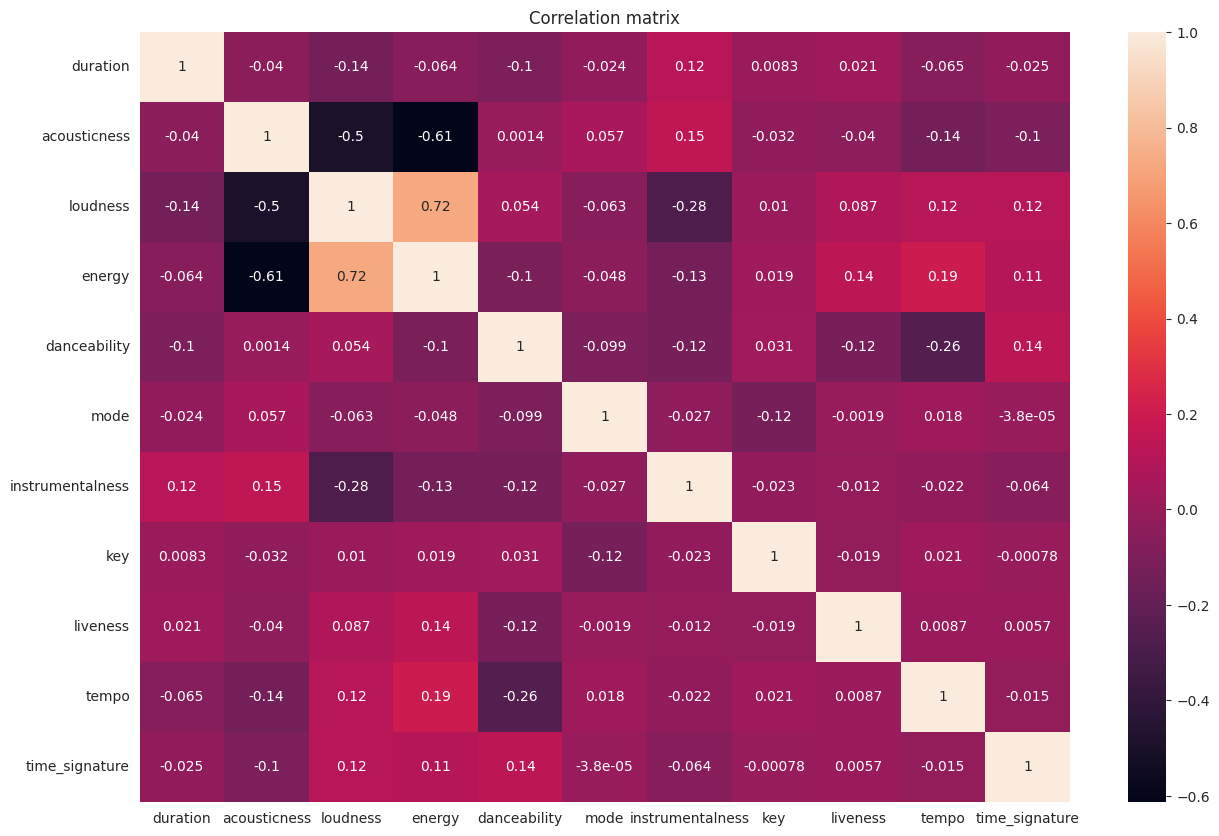

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(df.iloc[:, :16].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix")
plt.show()

We only plot the spotify features here, since we have way too many columns.
This is because we decided to use the pitches of every note as a feature. The problem is, that the amount of pitches is proportional to the length
of the song. To reduce the amount of features, we preprocessed the pitches per note down to 100 values per note. Though this still leaves us with around 1240 feature columns.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 0 to 7775
Columns: 1241 entries, _id to B_99
dtypes: float64(1235), int64(1), object(5)
memory usage: 69.9+ MB


## Pitches

Since we have over ~100 different tags, we decided to take a closer look at the following tags, to
 get some sense fo our features, we decided to take a closer look at 5 different tags.


In [27]:
df_by_tags = {
    "rock": df[df["tags"].apply(lambda x: "rock" in x)],
    "metal": df[df["tags"].apply(lambda x: "metal" in x)],
    "hip hop": df[df["tags"].apply(lambda x: "hip hop" in x)],
    "jazz": df[df["tags"].apply(lambda x: "jazz" in x)],
    "electro": df[df["tags"].apply(lambda x: "electro" in x)],
    "indie": df[df["tags"].apply(lambda x: "indie" in x)],
    "edm": df[df["tags"].apply(lambda x: "edm" in x)],
    "classic": df[df["tags"].apply(lambda x: "classic" in x)],
    "piano": df[df["tags"].apply(lambda x: "piano" in x)],
}

rock_df = df_by_tags["rock"]

### Rock

Here we check if the correlation matrix of just the songs tagged with `rock` is different from the correlation matrix of all songs.
But as we can see, it looks pretty much the same.

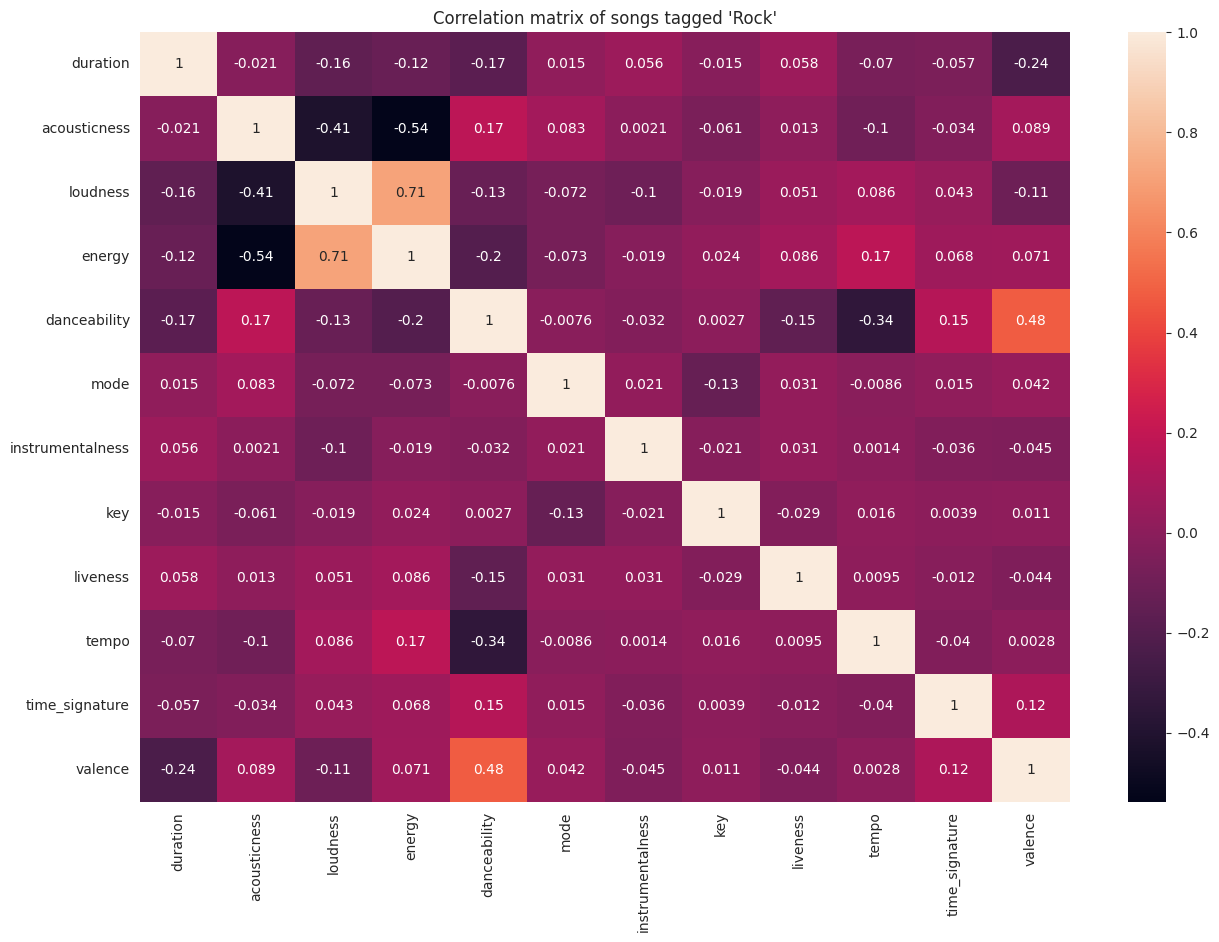

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(rock_df.iloc[:, :17].corr(numeric_only=True), annot=True)
plt.title("Correlation matrix of songs tagged 'Rock'")
plt.show()

This plot show the avg pitches of the songs tagged with `rock`.

Text(0.5, 1.0, "Avg pitches for songs tagged with 'rock'")

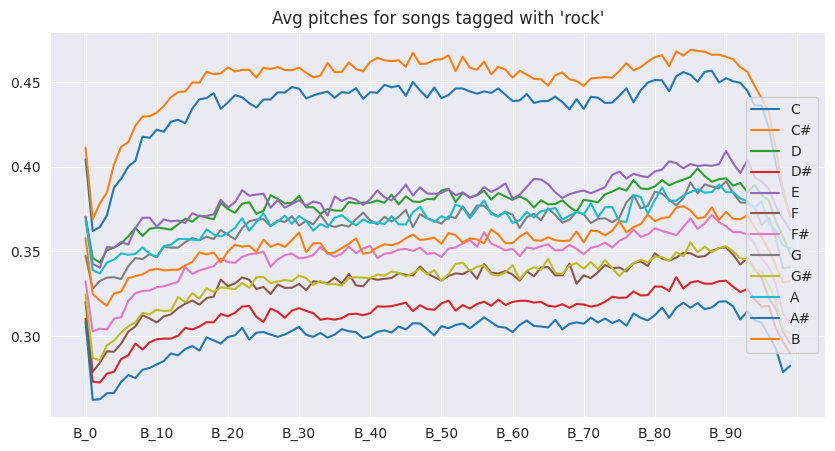

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_xticks(range(0, 101, 10))
#ax.set_xticklabels([i for i in range(0, 101, 10)])
for i, note in enumerate(pitch_symbol):
    #cur_ax.set_title(note)
    curr_df = rock_df[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
    curr_df.plot(ax=ax)
ax.legend(pitch_symbol, loc="center right")
ax.set_title("Avg pitches for songs tagged with 'rock'")

## Plots per tag
### Pitches

In order to compare the information above with other tags, we decided to plot the pitches separately and use the tags as the legend.

And as we can see from the averages, `edm` is very different from the other tags. The `metal` tag has a very strong presents in E and B

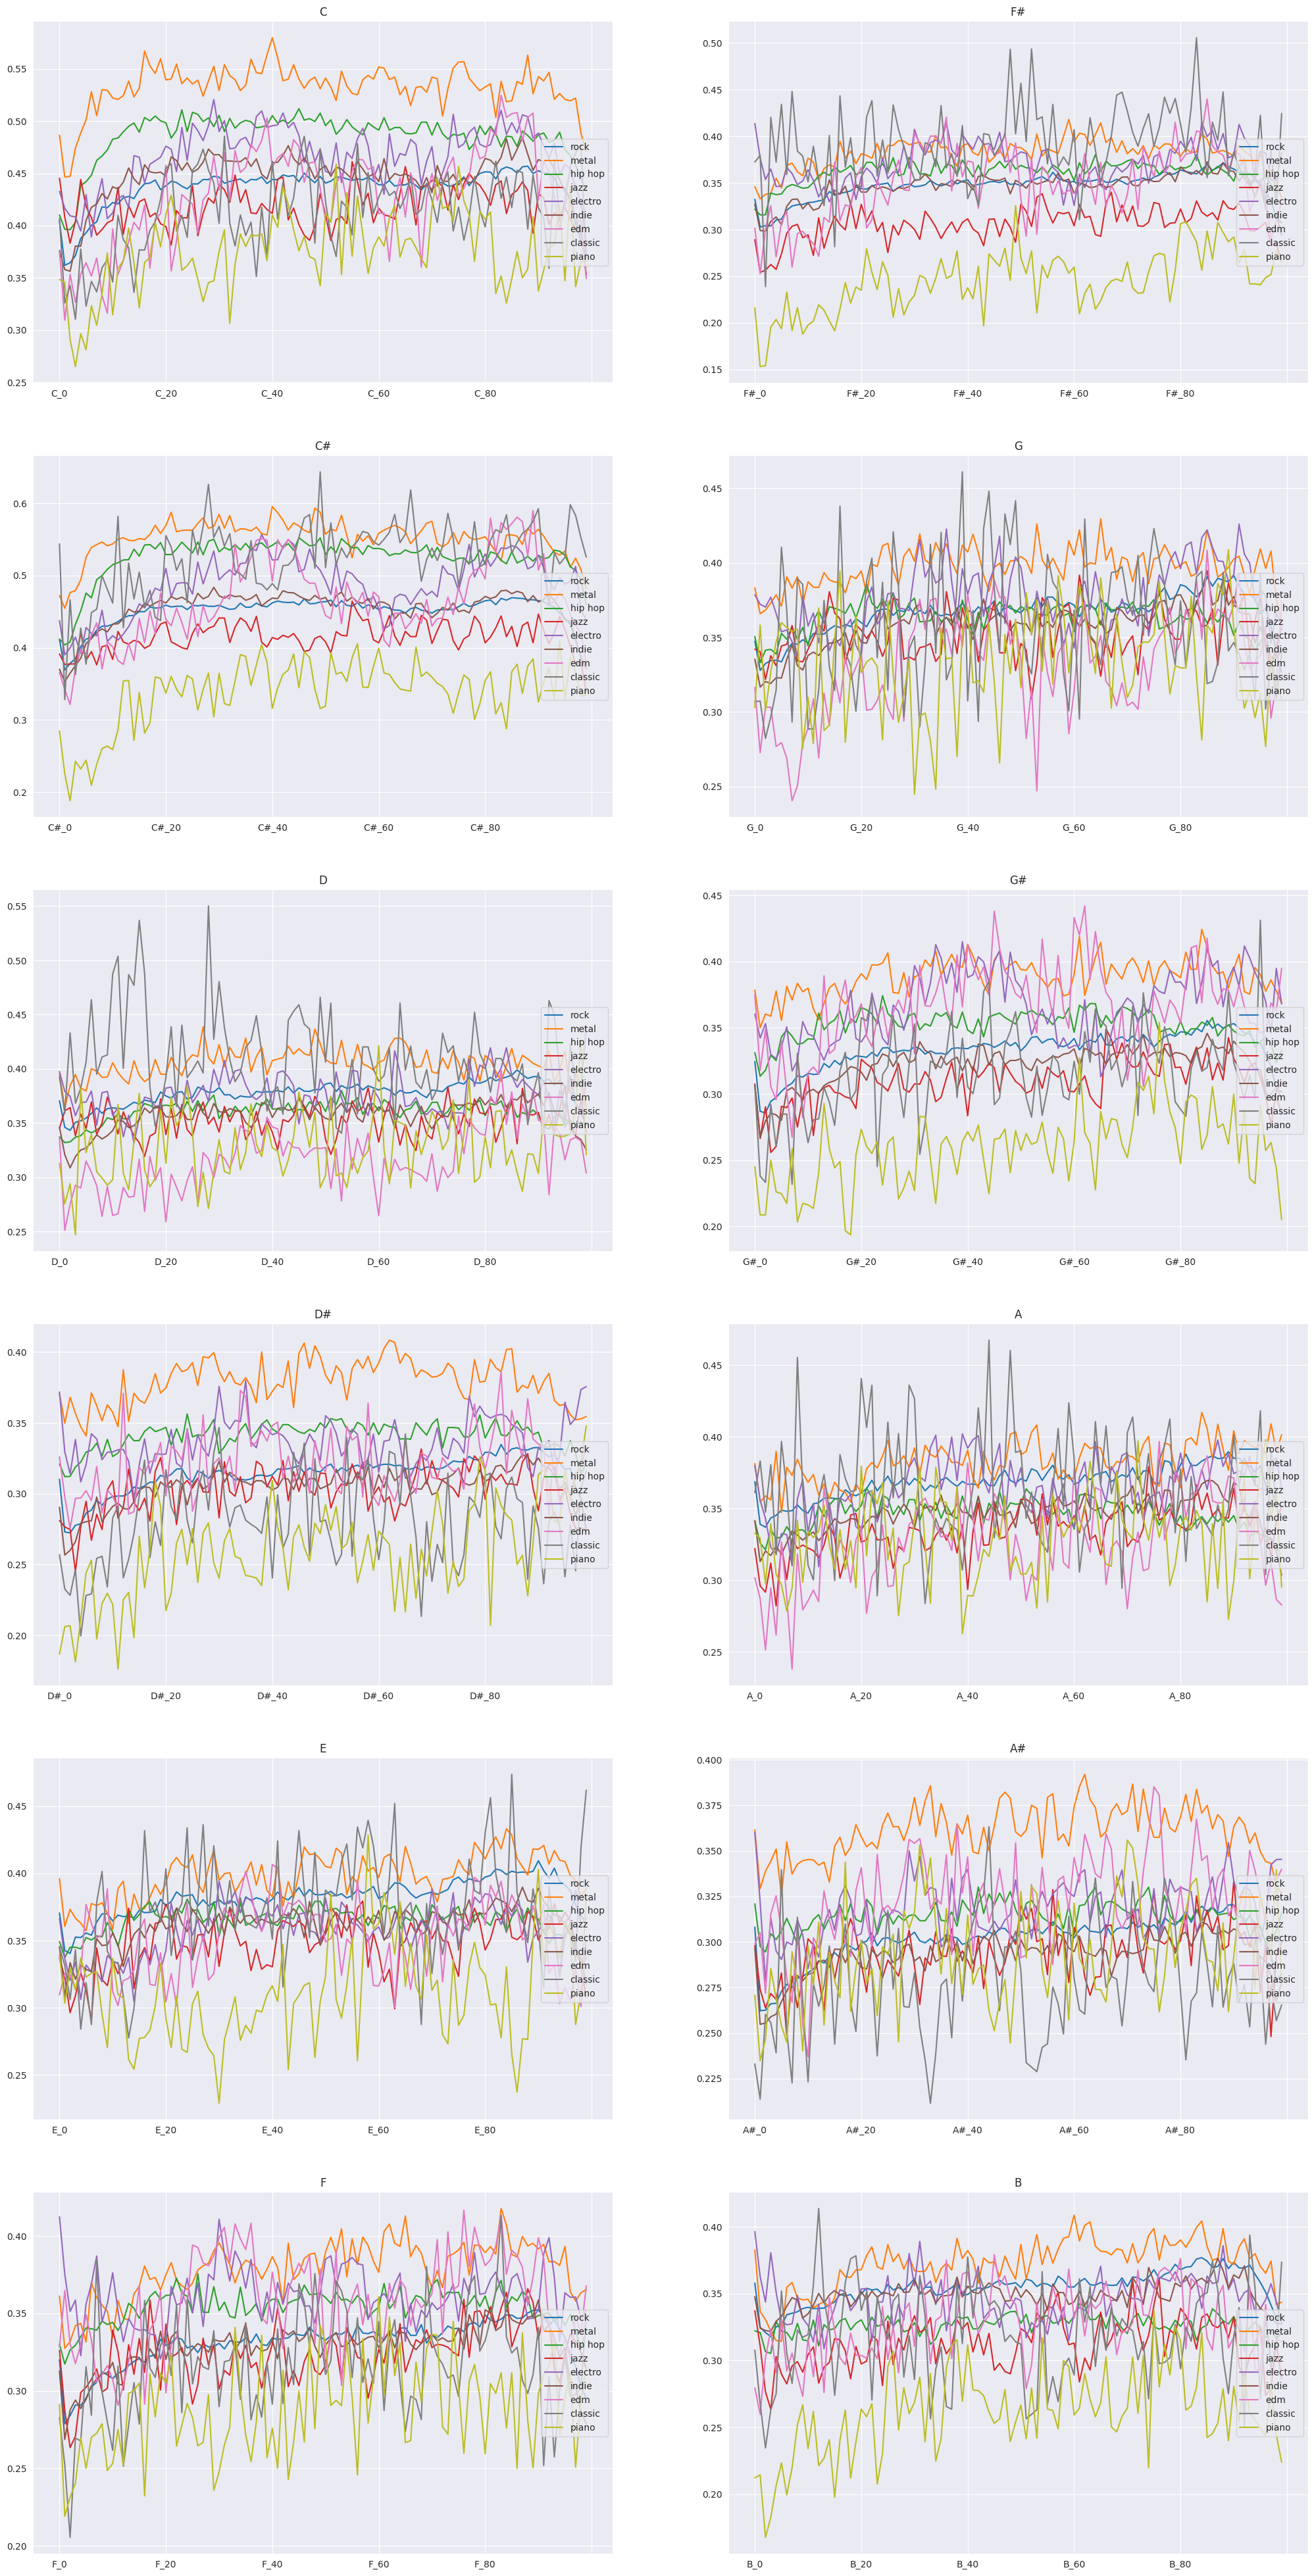

In [30]:
fig, ax = plt.subplots(len(pitch_symbol) // 2, 2, figsize=(25, 50))

for i, note in enumerate(pitch_symbol):
    cur_ax = ax[i % (len(pitch_symbol) // 2)][i // (len(pitch_symbol) // 2)]
    cur_ax.set_title(note)
    cur_ax.legend([*df_by_tags.keys()])
    for key, val in df_by_tags.items():
        curr_df = val[[*[note + "_" + str(i) for i in range(0, 100)]]].mean().transpose()
        curr_df.plot(ax=cur_ax, legend=False)

for i in ax:
    for axis in i:
        axis.legend([*df_by_tags.keys()], loc="center right")

## Spotify features

Here we decided to check if we could maybe differentiate our selected tags by plotting the boxplot of the spotify features for our selected tags.
But as we can see, most of them have a high spread and overlap, so we do not think that they are very helpful.

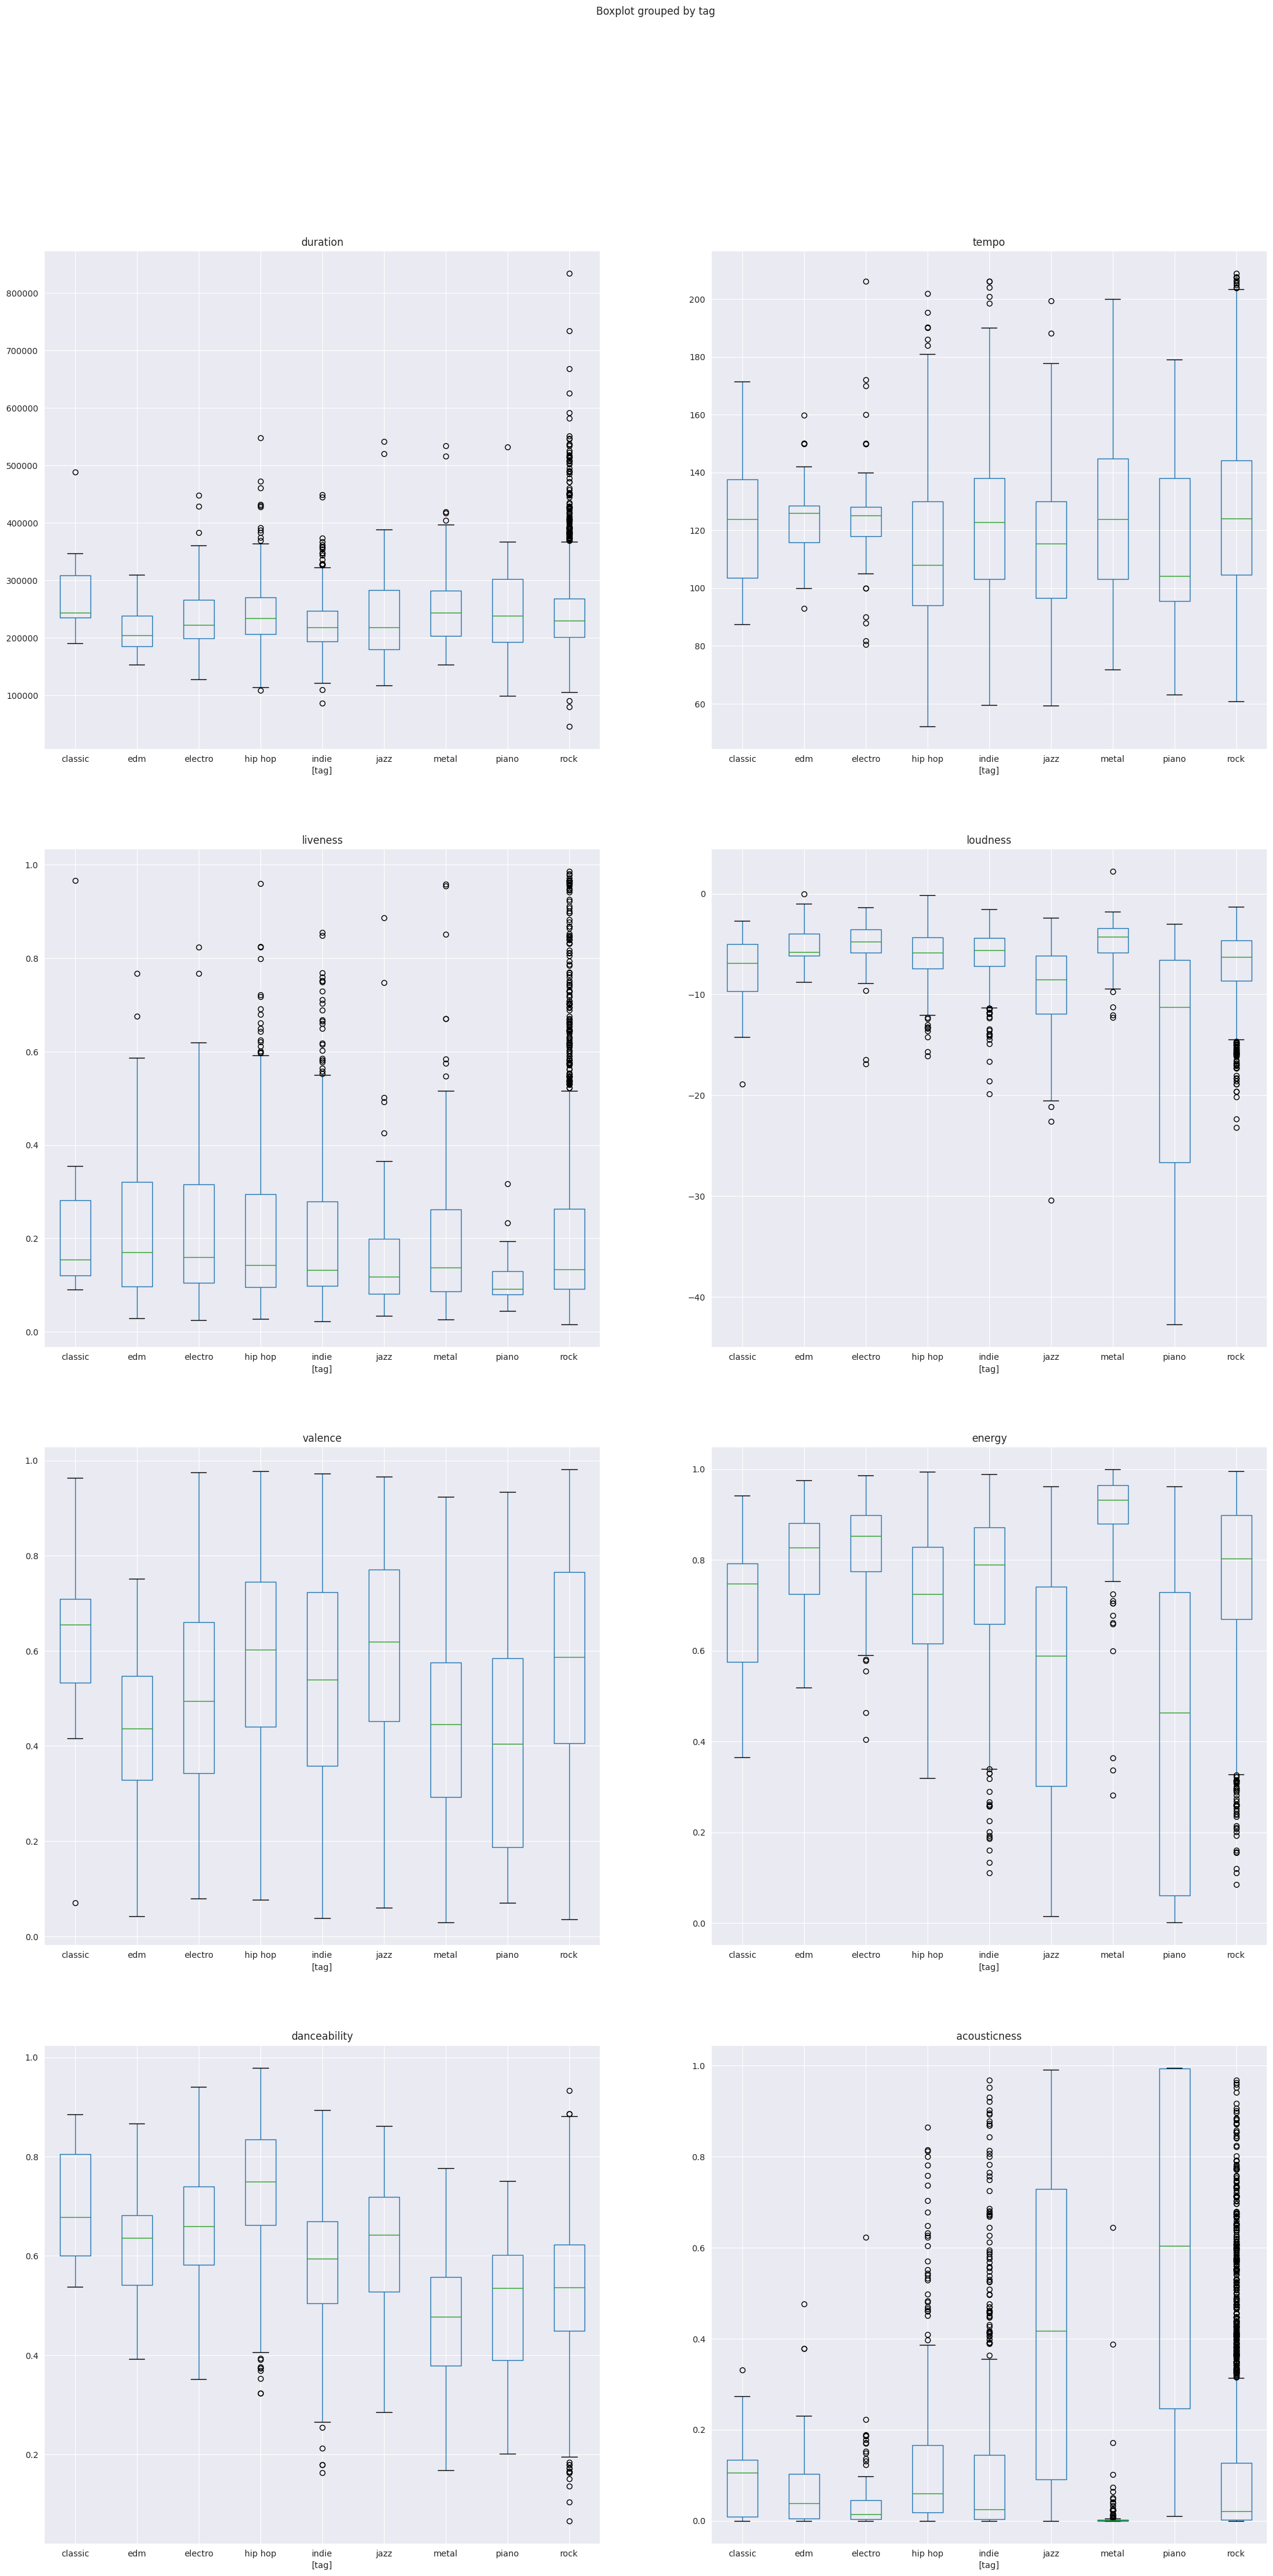

In [31]:
spotify_features = ['duration', 'liveness', 'valence', 'danceability', 'tempo', 'loudness', 'energy',
                    'acousticness']

fig, ax = plt.subplots(len(spotify_features) // 2, 2, figsize=(25, 50))

spotify_feature_df = pd.concat([
    df_by_tags["rock"].assign(tag="rock"),
    df_by_tags["metal"].assign(tag="metal"),
    df_by_tags["hip hop"].assign(tag="hip hop"),
    df_by_tags["jazz"].assign(tag="jazz"),
    df_by_tags["electro"].assign(tag="electro"),
    df_by_tags["indie"].assign(tag="indie"),
    df_by_tags["edm"].assign(tag="edm"),
    df_by_tags["classic"].assign(tag="classic"),
    df_by_tags["piano"].assign(tag="piano"),
])

for i, feature in enumerate(spotify_features):
    cur_ax = ax[i % (len(spotify_features) // 2)][i // (len(spotify_features) // 2)]
    cur_ax.set_title(feature)
    spotify_feature_df[["tag", feature]].boxplot(ax=cur_ax, by="tag")

## Songs per Tag

By counting the number of times a tag appears, we can see that we have an incredibly imbalanced dataset.
We think that this will mean that our classifier will try to tag most things with pop as it is by far the tag that appears the most often.
In the plot we already decided to filter out all tags that appear less than 250 times as they add no real information to the graph.

<class 'pandas.core.series.Series'>
Index: 3427 entries, rock to hauntology
Series name: None
Non-Null Count  Dtype
--------------  -----
3427 non-null   int64
dtypes: int64(1)
memory usage: 53.5+ KB

Top 20 appearing genres
rock                 2832
pop                  1610
alternative          1254
alternative rock     1023
classic rock          921
hip-hop               810
90s                   679
electronic            655
dance                 649
rap                   625
80s                   621
indie                 569
hard rock             525
female vocalists      496
hip hop               467
rnb                   419
70s                   414
soul                  361
country               323
singer-songwriter     287
dtype: int64


Text(0.5, 1.0, 'Number of songs tagged with x')

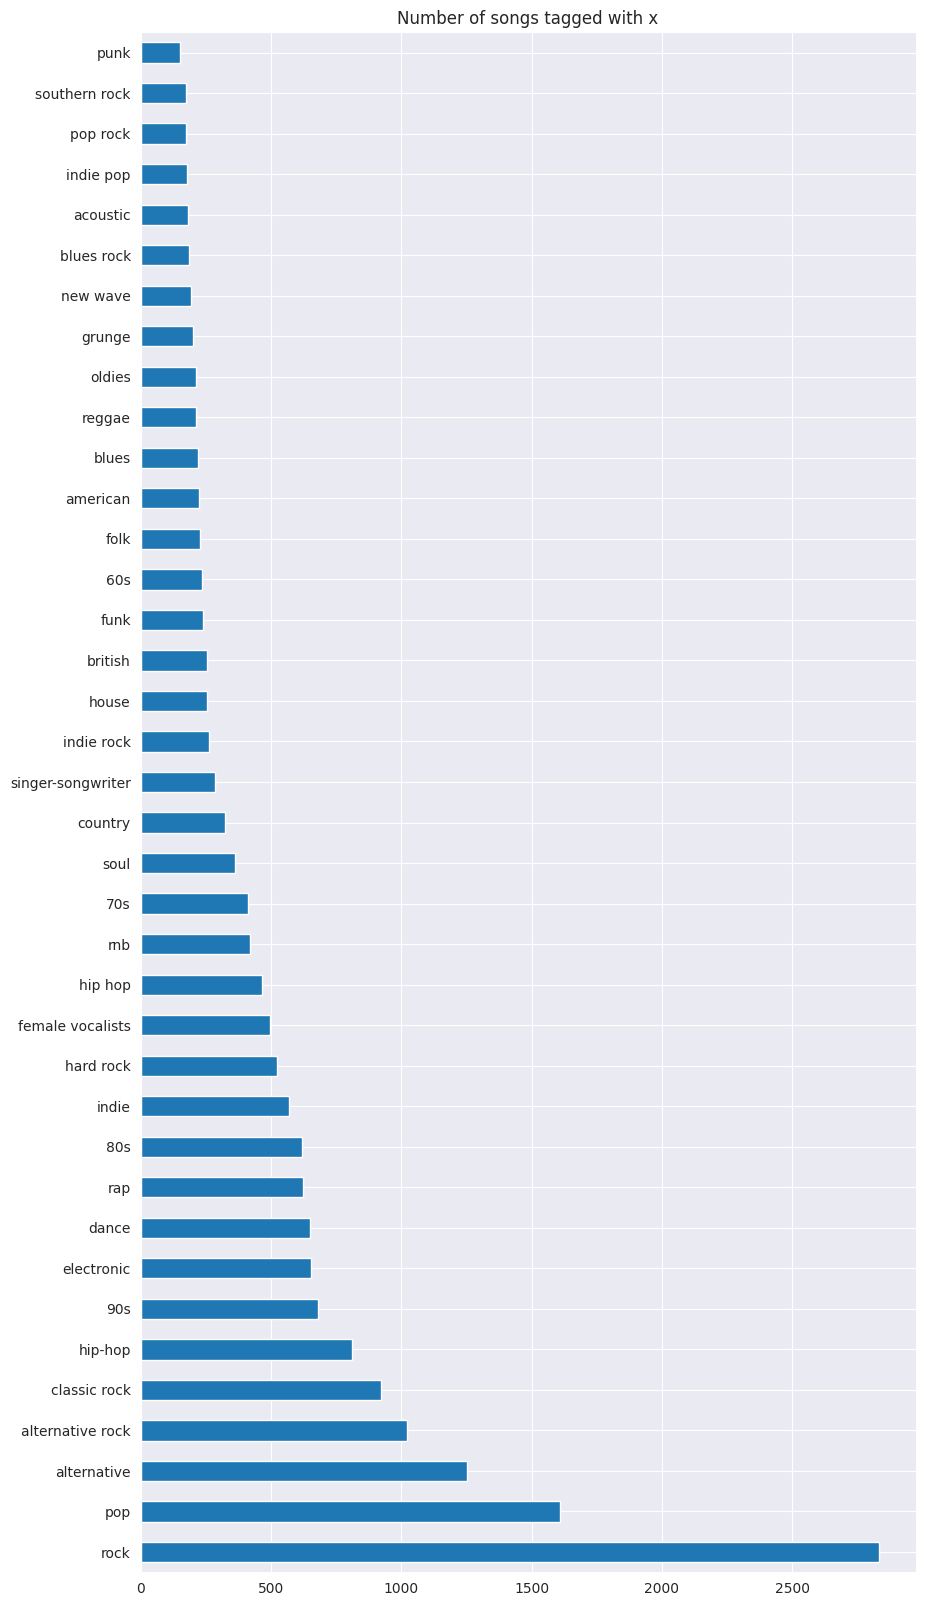

In [32]:
flatmap = lambda list_of_lists: [item for l in list_of_lists for item in l]
tags = pd.Series(flatmap(df["tags"].values.tolist()))
counts = tags.value_counts()
counts.info()
print()
print("Top 20 appearing genres")
print(counts[:20])
counts[counts > 150].plot.barh(figsize=(10, 20))
plt.title("Number of songs tagged with x")

# Feature Selection

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

# Create the MultiLabelBinarizer
df = df.iloc[:, 1:]  # drop id
mlb = MultiLabelBinarizer()
y = mlb.fit_transform([*df['tags']])

X = df.drop(columns=['tags', 'artist_names', 'name', "artist_genres"])

scaler = StandardScaler()
X = scaler.fit_transform(X)
#for index, item in enumerate(artist_genres):
#    X['artist_genres'].iloc[index] = item
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=234634754)  # 70/30 split

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline

# Create the pipeline
clf = Pipeline([
    # ('clf', RandomForestClassifier(n_jobs=-2))
    ('clf', KNeighborsClassifier(n_neighbors=10, n_jobs=-2))
])

# Fit the pipeline to the training data
clf.fit(X_train_pca, y_train)

Pipeline(steps=[('clf', KNeighborsClassifier(n_jobs=-2, n_neighbors=10))])

In [36]:
import numpy as np
# Define a threshold
# threshold = 0.5
# predicted_probas = clf.predict_proba(X_test_pca)
# Get the index of the class with the highest probability for each sample

In [37]:
# predicted_probas[0]
# transposed = [[] for i in range(0, len(predicted_probas[0]))]
# for i, _class in enumerate(predicted_probas):
#     for j, song in enumerate(_class):
#         transposed[j].append(song)
# transposed

In [38]:
# Use the trained model to predict the tags for the new songs
predicted_tags = clf.predict(X_test_pca)

In [39]:
predicted_tags

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [40]:
predicted_tags_inversed = mlb.inverse_transform(predicted_tags)
predicted_tags_inversed

[('rock',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 ('classic rock', 'rock'),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 ('pop',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('pop',),
 (),
 ('classic rock', 'rock'),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('alternative',),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 ('pop',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('hip-hop', 'rap'),
 (),
 ('rock',),
 (),
 (),
 (),
 ('rock',),
 (),
 (),
 (),
 (),
 ('pop',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 ('hip-hop', 'rap'),
 (),
 (),
 ('alternative',),
 ('rock',),
 (),
 (),
 ('hip hop', 'hip-hop', 'rap'),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('rock',),
 (),
 

In [41]:
y_pred = predicted_tags

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Get the predicted labels

# Calculate the accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, y_pred, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, y_pred, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average="samples")
print("F1-score: {:.2f}".format(f1))

Accuracy: 0.00
Precision: 0.11
Recall: 0.03
F1-score: 0.04


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn import svm as subvector

# svc = GridSearchCV(
#     estimator=subvector.SVC(),
#     param_grid=[{
#         # 'C': loguniform(0.1, 1, 100, 1000).rvs(20),
#         'C': loguniform(0.1, 1, 100).rvs(20),
#         'class_weight': ['balanced'],
#         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#         'gamma': loguniform(0.000035, 0.000245).rvs(20)
#     }],
#     n_jobs=-1
# )
# model = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=[{
#         'splitter': ['best', 'random'],
#         'max_depth': [10, 100, 1000],
#         'criterion': ['gini', 'entropy', 'log_loss'],
#         'class_weight': ['balanced']}],
#     scoring="accuracy",
#     n_jobs=-1
# )

etc = ExtraTreesClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 300, 900],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 12, 36, 108],
    'min_samples_split': [2, 8, 32],
    #    'min_samples_leaf': [1, 2, 4, 12],
    #    'max_leaf_nodes': [None, 2, 8, 256, 512],
    'max_features': ['sqrt', 'log2'],
    'n_jobs': [-2],
    'class_weight': ratios
}
model = GridSearchCV(etc, param_grid, n_jobs=-2)

# mlpc = MLPClassifier(solver='adam',
#                      learning_rate_init=0.01,
#                      max_iter=300,
#                      activation='relu',
#                      early_stopping=True)
# search_space = {
#     'alpha': 10.0 ** -np.arange(1, 5),
#     'hidden_layer_sizes': ((64, 32), (128, 64),
#                                             (64, 32, 16), (128, 64, 32)),
#     'tol': (1e-3, 5e-3, 1e-4),
# }
# model = mlpc
# model = GridSearchCV(mlpc, search_space, cv=5, n_jobs=-1)

# model = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
# https://scikit-learn.org/stable/modules/multiclass.html#
model.fit(X_train_pca, y_train)

TypeError: Parameter grid for parameter 'class_weight' needs to be a list or a numpy array, but got {0: 0.08738313431454225, 1: 0.04967755870282946, 2: 0.038692955660464684, 3: 0.03156530593353698, 4: 0.02841803202814033, 5: 0.024993057484032213, 6: 0.020950970409454164, 7: 0.020210435372890245, 8: 0.020025301613749266, 9: 0.01928476657718535, 10: 0.019161344071091362, 11: 0.017556851491869543, 12: 0.016199203924835693, 13: 0.015304390755654294, 14: 0.014409577586472893, 15: 0.012928507513345058, 16: 0.012774229380727576, 17: 0.011138881174982258, 18: 0.009966367367089389, 19: 0.008855564812243512, 20: 0.008053318522632602, 21: 0.007899040390015119, 22: 0.007868184763491623, 23: 0.007436205992162671, 24: 0.007220216606498195, 25: 0.007004227220833719, 26: 0.0069425159677867256, 27: 0.006757382208645747, 28: 0.006603104076028264, 29: 0.006510537196457774, 30: 0.006201980931222808, 31: 0.006016847172081829, 32: 0.00573914653337036, 33: 0.005646579653799871, 34: 0.005523157147705884, 35: 0.005399734641611898, 36: 0.005338023388564905, 37: 0.004720910858094974, 38: 0.004504921472430498, 39: 0.003918664568484063, 40: 0.003640963929772594, 41: 0.0032706964114906354, 42: 0.003147273905396649, 43: 0.0031164182788731526, 44: 0.0030238513993026627, 45: 0.0029621401462556697, 46: 0.0029004288932086768, 47: 0.00286957326668518, 48: 0.0028387176401616834, 49: 0.0025610170014502146, 50: 0.0025610170014502146, 51: 0.002499305748403221, 52: 0.0023450276157857383, 53: 0.0023450276157857383, 54: 0.0023450276157857383, 55: 0.0022833163627387454, 56: 0.002190749483168256, 57: 0.0021290382301212625, 58: 0.0020673269770742696, 59: 0.0019747600975037797, 60: 0.0019747600975037797, 61: 0.0019747600975037797, 62: 0.0019747600975037797, 63: 0.0019439044709802832, 64: 0.0018821932179332902, 65: 0.0018513375914097935, 66: 0.001820481964886297, 67: 0.001820481964886297, 68: 0.001820481964886297, 69: 0.001820481964886297, 70: 0.0017896263383628006, 71: 0.0017896263383628006, 72: 0.0017896263383628006, 73: 0.0017587707118393039, 74: 0.0016970594587923107, 75: 0.0016970594587923107, 76: 0.0016662038322688142, 77: 0.0015736369526983245, 78: 0.001542781326174828, 79: 0.001542781326174828, 80: 0.001542781326174828, 81: 0.0015119256996513313, 82: 0.0015119256996513313, 83: 0.0015119256996513313, 84: 0.0014502144466043384, 85: 0.0014193588200808417, 86: 0.0014193588200808417, 87: 0.0013576475670338487, 88: 0.0012959363139868555, 89: 0.0012959363139868555, 90: 0.0012959363139868555, 91: 0.001265080687463359, 92: 0.001265080687463359, 93: 0.0012342250609398623, 94: 0.0012033694344163659, 95: 0.0011725138078928692, 96: 0.0011725138078928692, 97: 0.0011725138078928692, 98: 0.0011416581813693727, 99: 0.0011416581813693727, 100: 0.0011416581813693727, 101: 0.0011108025548458762, 102: 0.0011108025548458762, 103: 0.0010799469283223795, 104: 0.001049091301798883, 105: 0.001049091301798883, 106: 0.001049091301798883, 107: 0.001049091301798883, 108: 0.001049091301798883, 109: 0.001049091301798883, 110: 0.001049091301798883, 111: 0.0010182356752753865, 112: 0.0010182356752753865, 113: 0.0010182356752753865, 114: 0.0009873800487518898, 115: 0.0009873800487518898, 116: 0.0009873800487518898, 117: 0.0009565244222283934, 118: 0.0009565244222283934, 119: 0.0009565244222283934, 120: 0.0009565244222283934, 121: 0.0009565244222283934, 122: 0.0008948131691814003, 123: 0.0008639575426579037, 124: 0.0008639575426579037, 125: 0.0008639575426579037, 126: 0.0008639575426579037, 127: 0.0008639575426579037, 128: 0.0008331019161344071, 129: 0.0008331019161344071, 130: 0.0008331019161344071, 131: 0.0008331019161344071, 132: 0.0008022462896109105, 133: 0.0008022462896109105, 134: 0.0008022462896109105, 135: 0.0008022462896109105, 136: 0.000771390663087414, 137: 0.0007405350365639174, 138: 0.0007405350365639174, 139: 0.0007405350365639174, 140: 0.0007405350365639174, 141: 0.0007405350365639174, 142: 0.0007405350365639174, 143: 0.0007405350365639174, 144: 0.0007096794100404208, 145: 0.0007096794100404208, 146: 0.0007096794100404208, 147: 0.0007096794100404208, 148: 0.0007096794100404208, 149: 0.0007096794100404208, 150: 0.0006788237835169244, 151: 0.0006788237835169244, 152: 0.0006788237835169244, 153: 0.0006788237835169244, 154: 0.0006479681569934278, 155: 0.0006479681569934278, 156: 0.0006479681569934278, 157: 0.0006479681569934278, 158: 0.0006479681569934278, 159: 0.0006171125304699312, 160: 0.0006171125304699312, 161: 0.0006171125304699312, 162: 0.0006171125304699312, 163: 0.0006171125304699312, 164: 0.0006171125304699312, 165: 0.0006171125304699312, 166: 0.0005862569039464346, 167: 0.0005862569039464346, 168: 0.0005862569039464346, 169: 0.0005862569039464346, 170: 0.0005862569039464346, 171: 0.0005862569039464346, 172: 0.0005862569039464346, 173: 0.0005862569039464346, 174: 0.0005554012774229381, 175: 0.0005245456508994415, 176: 0.0005245456508994415, 177: 0.0005245456508994415, 178: 0.0004936900243759449, 179: 0.0004936900243759449, 180: 0.0004936900243759449, 181: 0.0004936900243759449, 182: 0.0004936900243759449, 183: 0.0004936900243759449, 184: 0.0004936900243759449, 185: 0.0004936900243759449, 186: 0.0004936900243759449, 187: 0.0004936900243759449, 188: 0.0004936900243759449, 189: 0.0004936900243759449, 190: 0.0004628343978524484, 191: 0.0004628343978524484, 192: 0.0004628343978524484, 193: 0.0004628343978524484, 194: 0.0004628343978524484, 195: 0.0004628343978524484, 196: 0.0004628343978524484, 197: 0.0004628343978524484, 198: 0.0004628343978524484, 199: 0.0004628343978524484, 200: 0.0004628343978524484, 201: 0.0004628343978524484, 202: 0.00043197877132895184, 203: 0.00043197877132895184, 204: 0.00043197877132895184, 205: 0.00043197877132895184, 206: 0.00043197877132895184, 207: 0.00043197877132895184, 208: 0.00043197877132895184, 209: 0.00043197877132895184, 210: 0.00043197877132895184, 211: 0.00043197877132895184, 212: 0.00043197877132895184, 213: 0.00040112314480545525, 214: 0.00040112314480545525, 215: 0.00040112314480545525, 216: 0.00040112314480545525, 217: 0.00040112314480545525, 218: 0.00040112314480545525, 219: 0.00040112314480545525, 220: 0.00040112314480545525, 221: 0.00040112314480545525, 222: 0.00040112314480545525, 223: 0.00040112314480545525, 224: 0.00040112314480545525, 225: 0.00040112314480545525, 226: 0.00040112314480545525, 227: 0.0003702675182819587, 228: 0.0003702675182819587, 229: 0.0003702675182819587, 230: 0.0003702675182819587, 231: 0.0003702675182819587, 232: 0.0003702675182819587, 233: 0.0003702675182819587, 234: 0.0003702675182819587, 235: 0.0003702675182819587, 236: 0.0003702675182819587, 237: 0.0003702675182819587, 238: 0.0003702675182819587, 239: 0.0003702675182819587, 240: 0.0003394118917584622, 241: 0.0003394118917584622, 242: 0.0003394118917584622, 243: 0.0003394118917584622, 244: 0.0003394118917584622, 245: 0.0003394118917584622, 246: 0.0003394118917584622, 247: 0.0003394118917584622, 248: 0.0003394118917584622, 249: 0.0003394118917584622, 250: 0.0003394118917584622, 251: 0.0003394118917584622, 252: 0.0003394118917584622, 253: 0.0003394118917584622, 254: 0.0003394118917584622, 255: 0.0003394118917584622, 256: 0.0003394118917584622, 257: 0.0003394118917584622, 258: 0.0003394118917584622, 259: 0.0003394118917584622, 260: 0.0003394118917584622, 261: 0.0003394118917584622, 262: 0.0003085562652349656, 263: 0.0003085562652349656, 264: 0.0003085562652349656, 265: 0.0003085562652349656, 266: 0.0003085562652349656, 267: 0.0003085562652349656, 268: 0.0003085562652349656, 269: 0.0003085562652349656, 270: 0.0003085562652349656, 271: 0.0003085562652349656, 272: 0.0003085562652349656, 273: 0.0003085562652349656, 274: 0.0003085562652349656, 275: 0.0003085562652349656, 276: 0.0003085562652349656, 277: 0.0003085562652349656, 278: 0.0003085562652349656, 279: 0.00027770063871146905, 280: 0.00027770063871146905, 281: 0.00027770063871146905, 282: 0.00027770063871146905, 283: 0.00027770063871146905, 284: 0.00027770063871146905, 285: 0.00027770063871146905, 286: 0.00027770063871146905, 287: 0.00027770063871146905, 288: 0.00027770063871146905, 289: 0.00027770063871146905, 290: 0.00027770063871146905, 291: 0.00027770063871146905, 292: 0.00027770063871146905, 293: 0.00027770063871146905, 294: 0.00027770063871146905, 295: 0.00027770063871146905, 296: 0.00027770063871146905, 297: 0.00027770063871146905, 298: 0.00027770063871146905, 299: 0.00027770063871146905, 300: 0.00027770063871146905, 301: 0.00027770063871146905, 302: 0.00027770063871146905, 303: 0.00027770063871146905, 304: 0.00024684501218797246, 305: 0.00024684501218797246, 306: 0.00024684501218797246, 307: 0.00024684501218797246, 308: 0.00024684501218797246, 309: 0.00024684501218797246, 310: 0.00024684501218797246, 311: 0.00024684501218797246, 312: 0.00024684501218797246, 313: 0.00024684501218797246, 314: 0.00024684501218797246, 315: 0.00024684501218797246, 316: 0.00024684501218797246, 317: 0.00024684501218797246, 318: 0.00024684501218797246, 319: 0.00024684501218797246, 320: 0.00024684501218797246, 321: 0.00024684501218797246, 322: 0.00024684501218797246, 323: 0.00024684501218797246, 324: 0.00024684501218797246, 325: 0.00024684501218797246, 326: 0.00024684501218797246, 327: 0.00024684501218797246, 328: 0.00024684501218797246, 329: 0.00024684501218797246, 330: 0.00024684501218797246, 331: 0.00024684501218797246, 332: 0.00024684501218797246, 333: 0.00024684501218797246, 334: 0.00024684501218797246, 335: 0.00024684501218797246, 336: 0.00024684501218797246, 337: 0.00024684501218797246, 338: 0.00024684501218797246, 339: 0.00024684501218797246, 340: 0.00024684501218797246, 341: 0.00024684501218797246, 342: 0.00021598938566447592, 343: 0.00021598938566447592, 344: 0.00021598938566447592, 345: 0.00021598938566447592, 346: 0.00021598938566447592, 347: 0.00021598938566447592, 348: 0.00021598938566447592, 349: 0.00021598938566447592, 350: 0.00021598938566447592, 351: 0.00021598938566447592, 352: 0.00021598938566447592, 353: 0.00021598938566447592, 354: 0.00021598938566447592, 355: 0.00021598938566447592, 356: 0.00021598938566447592, 357: 0.00021598938566447592, 358: 0.00021598938566447592, 359: 0.00021598938566447592, 360: 0.00021598938566447592, 361: 0.00021598938566447592, 362: 0.00021598938566447592, 363: 0.00021598938566447592, 364: 0.00021598938566447592, 365: 0.00021598938566447592, 366: 0.00021598938566447592, 367: 0.00021598938566447592, 368: 0.00021598938566447592, 369: 0.00021598938566447592, 370: 0.00021598938566447592, 371: 0.00021598938566447592, 372: 0.00021598938566447592, 373: 0.00021598938566447592, 374: 0.00021598938566447592, 375: 0.00021598938566447592, 376: 0.00021598938566447592, 377: 0.00021598938566447592, 378: 0.00021598938566447592, 379: 0.00021598938566447592, 380: 0.00021598938566447592, 381: 0.00021598938566447592, 382: 0.00021598938566447592, 383: 0.00021598938566447592, 384: 0.00021598938566447592, 385: 0.00018513375914097936, 386: 0.00018513375914097936, 387: 0.00018513375914097936, 388: 0.00018513375914097936, 389: 0.00018513375914097936, 390: 0.00018513375914097936, 391: 0.00018513375914097936, 392: 0.00018513375914097936, 393: 0.00018513375914097936, 394: 0.00018513375914097936, 395: 0.00018513375914097936, 396: 0.00018513375914097936, 397: 0.00018513375914097936, 398: 0.00018513375914097936, 399: 0.00018513375914097936, 400: 0.00018513375914097936, 401: 0.00018513375914097936, 402: 0.00018513375914097936, 403: 0.00018513375914097936, 404: 0.00018513375914097936, 405: 0.00018513375914097936, 406: 0.00018513375914097936, 407: 0.00018513375914097936, 408: 0.00018513375914097936, 409: 0.00018513375914097936, 410: 0.00018513375914097936, 411: 0.00018513375914097936, 412: 0.00018513375914097936, 413: 0.00018513375914097936, 414: 0.00018513375914097936, 415: 0.00018513375914097936, 416: 0.00018513375914097936, 417: 0.00018513375914097936, 418: 0.00018513375914097936, 419: 0.00018513375914097936, 420: 0.00018513375914097936, 421: 0.00018513375914097936, 422: 0.00018513375914097936, 423: 0.00018513375914097936, 424: 0.00018513375914097936, 425: 0.00018513375914097936, 426: 0.00018513375914097936, 427: 0.00018513375914097936, 428: 0.00018513375914097936, 429: 0.00018513375914097936, 430: 0.00018513375914097936, 431: 0.00018513375914097936, 432: 0.00018513375914097936, 433: 0.00018513375914097936, 434: 0.00018513375914097936, 435: 0.00018513375914097936, 436: 0.00018513375914097936, 437: 0.00018513375914097936, 438: 0.00018513375914097936, 439: 0.00018513375914097936, 440: 0.00018513375914097936, 441: 0.00018513375914097936, 442: 0.00018513375914097936, 443: 0.00018513375914097936, 444: 0.00018513375914097936, 445: 0.00018513375914097936, 446: 0.00018513375914097936, 447: 0.00018513375914097936, 448: 0.00018513375914097936, 449: 0.00018513375914097936, 450: 0.0001542781326174828, 451: 0.0001542781326174828, 452: 0.0001542781326174828, 453: 0.0001542781326174828, 454: 0.0001542781326174828, 455: 0.0001542781326174828, 456: 0.0001542781326174828, 457: 0.0001542781326174828, 458: 0.0001542781326174828, 459: 0.0001542781326174828, 460: 0.0001542781326174828, 461: 0.0001542781326174828, 462: 0.0001542781326174828, 463: 0.0001542781326174828, 464: 0.0001542781326174828, 465: 0.0001542781326174828, 466: 0.0001542781326174828, 467: 0.0001542781326174828, 468: 0.0001542781326174828, 469: 0.0001542781326174828, 470: 0.0001542781326174828, 471: 0.0001542781326174828, 472: 0.0001542781326174828, 473: 0.0001542781326174828, 474: 0.0001542781326174828, 475: 0.0001542781326174828, 476: 0.0001542781326174828, 477: 0.0001542781326174828, 478: 0.0001542781326174828, 479: 0.0001542781326174828, 480: 0.0001542781326174828, 481: 0.0001542781326174828, 482: 0.0001542781326174828, 483: 0.0001542781326174828, 484: 0.0001542781326174828, 485: 0.0001542781326174828, 486: 0.0001542781326174828, 487: 0.0001542781326174828, 488: 0.0001542781326174828, 489: 0.0001542781326174828, 490: 0.0001542781326174828, 491: 0.0001542781326174828, 492: 0.0001542781326174828, 493: 0.0001542781326174828, 494: 0.0001542781326174828, 495: 0.0001542781326174828, 496: 0.0001542781326174828, 497: 0.0001542781326174828, 498: 0.0001542781326174828, 499: 0.0001542781326174828, 500: 0.0001542781326174828, 501: 0.0001542781326174828, 502: 0.0001542781326174828, 503: 0.0001542781326174828, 504: 0.0001542781326174828, 505: 0.0001542781326174828, 506: 0.0001542781326174828, 507: 0.0001542781326174828, 508: 0.0001542781326174828, 509: 0.0001542781326174828, 510: 0.0001542781326174828, 511: 0.0001542781326174828, 512: 0.0001542781326174828, 513: 0.0001542781326174828, 514: 0.0001542781326174828, 515: 0.0001542781326174828, 516: 0.0001542781326174828, 517: 0.0001542781326174828, 518: 0.0001542781326174828, 519: 0.0001542781326174828, 520: 0.0001542781326174828, 521: 0.0001542781326174828, 522: 0.0001542781326174828, 523: 0.0001542781326174828, 524: 0.0001542781326174828, 525: 0.0001542781326174828, 526: 0.0001542781326174828, 527: 0.0001542781326174828, 528: 0.0001542781326174828, 529: 0.0001542781326174828, 530: 0.0001542781326174828, 531: 0.0001542781326174828, 532: 0.0001542781326174828, 533: 0.0001542781326174828, 534: 0.0001542781326174828, 535: 0.0001542781326174828, 536: 0.0001542781326174828, 537: 0.0001542781326174828, 538: 0.0001542781326174828, 539: 0.00012342250609398623, 540: 0.00012342250609398623, 541: 0.00012342250609398623, 542: 0.00012342250609398623, 543: 0.00012342250609398623, 544: 0.00012342250609398623, 545: 0.00012342250609398623, 546: 0.00012342250609398623, 547: 0.00012342250609398623, 548: 0.00012342250609398623, 549: 0.00012342250609398623, 550: 0.00012342250609398623, 551: 0.00012342250609398623, 552: 0.00012342250609398623, 553: 0.00012342250609398623, 554: 0.00012342250609398623, 555: 0.00012342250609398623, 556: 0.00012342250609398623, 557: 0.00012342250609398623, 558: 0.00012342250609398623, 559: 0.00012342250609398623, 560: 0.00012342250609398623, 561: 0.00012342250609398623, 562: 0.00012342250609398623, 563: 0.00012342250609398623, 564: 0.00012342250609398623, 565: 0.00012342250609398623, 566: 0.00012342250609398623, 567: 0.00012342250609398623, 568: 0.00012342250609398623, 569: 0.00012342250609398623, 570: 0.00012342250609398623, 571: 0.00012342250609398623, 572: 0.00012342250609398623, 573: 0.00012342250609398623, 574: 0.00012342250609398623, 575: 0.00012342250609398623, 576: 0.00012342250609398623, 577: 0.00012342250609398623, 578: 0.00012342250609398623, 579: 0.00012342250609398623, 580: 0.00012342250609398623, 581: 0.00012342250609398623, 582: 0.00012342250609398623, 583: 0.00012342250609398623, 584: 0.00012342250609398623, 585: 0.00012342250609398623, 586: 0.00012342250609398623, 587: 0.00012342250609398623, 588: 0.00012342250609398623, 589: 0.00012342250609398623, 590: 0.00012342250609398623, 591: 0.00012342250609398623, 592: 0.00012342250609398623, 593: 0.00012342250609398623, 594: 0.00012342250609398623, 595: 0.00012342250609398623, 596: 0.00012342250609398623, 597: 0.00012342250609398623, 598: 0.00012342250609398623, 599: 0.00012342250609398623, 600: 0.00012342250609398623, 601: 0.00012342250609398623, 602: 0.00012342250609398623, 603: 0.00012342250609398623, 604: 0.00012342250609398623, 605: 0.00012342250609398623, 606: 0.00012342250609398623, 607: 0.00012342250609398623, 608: 0.00012342250609398623, 609: 0.00012342250609398623, 610: 0.00012342250609398623, 611: 0.00012342250609398623, 612: 0.00012342250609398623, 613: 0.00012342250609398623, 614: 0.00012342250609398623, 615: 0.00012342250609398623, 616: 0.00012342250609398623, 617: 0.00012342250609398623, 618: 0.00012342250609398623, 619: 0.00012342250609398623, 620: 0.00012342250609398623, 621: 0.00012342250609398623, 622: 0.00012342250609398623, 623: 0.00012342250609398623, 624: 0.00012342250609398623, 625: 0.00012342250609398623, 626: 0.00012342250609398623, 627: 0.00012342250609398623, 628: 0.00012342250609398623, 629: 0.00012342250609398623, 630: 0.00012342250609398623, 631: 0.00012342250609398623, 632: 0.00012342250609398623, 633: 0.00012342250609398623, 634: 0.00012342250609398623, 635: 0.00012342250609398623, 636: 0.00012342250609398623, 637: 0.00012342250609398623, 638: 0.00012342250609398623, 639: 0.00012342250609398623, 640: 0.00012342250609398623, 641: 0.00012342250609398623, 642: 0.00012342250609398623, 643: 0.00012342250609398623, 644: 0.00012342250609398623, 645: 0.00012342250609398623, 646: 0.00012342250609398623, 647: 0.00012342250609398623, 648: 0.00012342250609398623, 649: 0.00012342250609398623, 650: 0.00012342250609398623, 651: 0.00012342250609398623, 652: 0.00012342250609398623, 653: 0.00012342250609398623, 654: 0.00012342250609398623, 655: 0.00012342250609398623, 656: 0.00012342250609398623, 657: 0.00012342250609398623, 658: 0.00012342250609398623, 659: 0.00012342250609398623, 660: 0.00012342250609398623, 661: 0.00012342250609398623, 662: 0.00012342250609398623, 663: 0.00012342250609398623, 664: 0.00012342250609398623, 665: 0.00012342250609398623, 666: 0.00012342250609398623, 667: 0.00012342250609398623, 668: 0.00012342250609398623, 669: 0.00012342250609398623, 670: 0.00012342250609398623, 671: 0.00012342250609398623, 672: 0.00012342250609398623, 673: 9.256687957048968e-05, 674: 9.256687957048968e-05, 675: 9.256687957048968e-05, 676: 9.256687957048968e-05, 677: 9.256687957048968e-05, 678: 9.256687957048968e-05, 679: 9.256687957048968e-05, 680: 9.256687957048968e-05, 681: 9.256687957048968e-05, 682: 9.256687957048968e-05, 683: 9.256687957048968e-05, 684: 9.256687957048968e-05, 685: 9.256687957048968e-05, 686: 9.256687957048968e-05, 687: 9.256687957048968e-05, 688: 9.256687957048968e-05, 689: 9.256687957048968e-05, 690: 9.256687957048968e-05, 691: 9.256687957048968e-05, 692: 9.256687957048968e-05, 693: 9.256687957048968e-05, 694: 9.256687957048968e-05, 695: 9.256687957048968e-05, 696: 9.256687957048968e-05, 697: 9.256687957048968e-05, 698: 9.256687957048968e-05, 699: 9.256687957048968e-05, 700: 9.256687957048968e-05, 701: 9.256687957048968e-05, 702: 9.256687957048968e-05, 703: 9.256687957048968e-05, 704: 9.256687957048968e-05, 705: 9.256687957048968e-05, 706: 9.256687957048968e-05, 707: 9.256687957048968e-05, 708: 9.256687957048968e-05, 709: 9.256687957048968e-05, 710: 9.256687957048968e-05, 711: 9.256687957048968e-05, 712: 9.256687957048968e-05, 713: 9.256687957048968e-05, 714: 9.256687957048968e-05, 715: 9.256687957048968e-05, 716: 9.256687957048968e-05, 717: 9.256687957048968e-05, 718: 9.256687957048968e-05, 719: 9.256687957048968e-05, 720: 9.256687957048968e-05, 721: 9.256687957048968e-05, 722: 9.256687957048968e-05, 723: 9.256687957048968e-05, 724: 9.256687957048968e-05, 725: 9.256687957048968e-05, 726: 9.256687957048968e-05, 727: 9.256687957048968e-05, 728: 9.256687957048968e-05, 729: 9.256687957048968e-05, 730: 9.256687957048968e-05, 731: 9.256687957048968e-05, 732: 9.256687957048968e-05, 733: 9.256687957048968e-05, 734: 9.256687957048968e-05, 735: 9.256687957048968e-05, 736: 9.256687957048968e-05, 737: 9.256687957048968e-05, 738: 9.256687957048968e-05, 739: 9.256687957048968e-05, 740: 9.256687957048968e-05, 741: 9.256687957048968e-05, 742: 9.256687957048968e-05, 743: 9.256687957048968e-05, 744: 9.256687957048968e-05, 745: 9.256687957048968e-05, 746: 9.256687957048968e-05, 747: 9.256687957048968e-05, 748: 9.256687957048968e-05, 749: 9.256687957048968e-05, 750: 9.256687957048968e-05, 751: 9.256687957048968e-05, 752: 9.256687957048968e-05, 753: 9.256687957048968e-05, 754: 9.256687957048968e-05, 755: 9.256687957048968e-05, 756: 9.256687957048968e-05, 757: 9.256687957048968e-05, 758: 9.256687957048968e-05, 759: 9.256687957048968e-05, 760: 9.256687957048968e-05, 761: 9.256687957048968e-05, 762: 9.256687957048968e-05, 763: 9.256687957048968e-05, 764: 9.256687957048968e-05, 765: 9.256687957048968e-05, 766: 9.256687957048968e-05, 767: 9.256687957048968e-05, 768: 9.256687957048968e-05, 769: 9.256687957048968e-05, 770: 9.256687957048968e-05, 771: 9.256687957048968e-05, 772: 9.256687957048968e-05, 773: 9.256687957048968e-05, 774: 9.256687957048968e-05, 775: 9.256687957048968e-05, 776: 9.256687957048968e-05, 777: 9.256687957048968e-05, 778: 9.256687957048968e-05, 779: 9.256687957048968e-05, 780: 9.256687957048968e-05, 781: 9.256687957048968e-05, 782: 9.256687957048968e-05, 783: 9.256687957048968e-05, 784: 9.256687957048968e-05, 785: 9.256687957048968e-05, 786: 9.256687957048968e-05, 787: 9.256687957048968e-05, 788: 9.256687957048968e-05, 789: 9.256687957048968e-05, 790: 9.256687957048968e-05, 791: 9.256687957048968e-05, 792: 9.256687957048968e-05, 793: 9.256687957048968e-05, 794: 9.256687957048968e-05, 795: 9.256687957048968e-05, 796: 9.256687957048968e-05, 797: 9.256687957048968e-05, 798: 9.256687957048968e-05, 799: 9.256687957048968e-05, 800: 9.256687957048968e-05, 801: 9.256687957048968e-05, 802: 9.256687957048968e-05, 803: 9.256687957048968e-05, 804: 9.256687957048968e-05, 805: 9.256687957048968e-05, 806: 9.256687957048968e-05, 807: 9.256687957048968e-05, 808: 9.256687957048968e-05, 809: 9.256687957048968e-05, 810: 9.256687957048968e-05, 811: 9.256687957048968e-05, 812: 9.256687957048968e-05, 813: 9.256687957048968e-05, 814: 9.256687957048968e-05, 815: 9.256687957048968e-05, 816: 9.256687957048968e-05, 817: 9.256687957048968e-05, 818: 9.256687957048968e-05, 819: 9.256687957048968e-05, 820: 9.256687957048968e-05, 821: 9.256687957048968e-05, 822: 9.256687957048968e-05, 823: 9.256687957048968e-05, 824: 9.256687957048968e-05, 825: 9.256687957048968e-05, 826: 9.256687957048968e-05, 827: 9.256687957048968e-05, 828: 9.256687957048968e-05, 829: 9.256687957048968e-05, 830: 9.256687957048968e-05, 831: 9.256687957048968e-05, 832: 9.256687957048968e-05, 833: 9.256687957048968e-05, 834: 9.256687957048968e-05, 835: 9.256687957048968e-05, 836: 9.256687957048968e-05, 837: 9.256687957048968e-05, 838: 9.256687957048968e-05, 839: 9.256687957048968e-05, 840: 9.256687957048968e-05, 841: 9.256687957048968e-05, 842: 9.256687957048968e-05, 843: 9.256687957048968e-05, 844: 9.256687957048968e-05, 845: 9.256687957048968e-05, 846: 9.256687957048968e-05, 847: 9.256687957048968e-05, 848: 9.256687957048968e-05, 849: 9.256687957048968e-05, 850: 9.256687957048968e-05, 851: 9.256687957048968e-05, 852: 9.256687957048968e-05, 853: 9.256687957048968e-05, 854: 9.256687957048968e-05, 855: 9.256687957048968e-05, 856: 9.256687957048968e-05, 857: 9.256687957048968e-05, 858: 9.256687957048968e-05, 859: 9.256687957048968e-05, 860: 9.256687957048968e-05, 861: 9.256687957048968e-05, 862: 9.256687957048968e-05, 863: 9.256687957048968e-05, 864: 9.256687957048968e-05, 865: 9.256687957048968e-05, 866: 9.256687957048968e-05, 867: 9.256687957048968e-05, 868: 9.256687957048968e-05, 869: 6.171125304699311e-05, 870: 6.171125304699311e-05, 871: 6.171125304699311e-05, 872: 6.171125304699311e-05, 873: 6.171125304699311e-05, 874: 6.171125304699311e-05, 875: 6.171125304699311e-05, 876: 6.171125304699311e-05, 877: 6.171125304699311e-05, 878: 6.171125304699311e-05, 879: 6.171125304699311e-05, 880: 6.171125304699311e-05, 881: 6.171125304699311e-05, 882: 6.171125304699311e-05, 883: 6.171125304699311e-05, 884: 6.171125304699311e-05, 885: 6.171125304699311e-05, 886: 6.171125304699311e-05, 887: 6.171125304699311e-05, 888: 6.171125304699311e-05, 889: 6.171125304699311e-05, 890: 6.171125304699311e-05, 891: 6.171125304699311e-05, 892: 6.171125304699311e-05, 893: 6.171125304699311e-05, 894: 6.171125304699311e-05, 895: 6.171125304699311e-05, 896: 6.171125304699311e-05, 897: 6.171125304699311e-05, 898: 6.171125304699311e-05, 899: 6.171125304699311e-05, 900: 6.171125304699311e-05, 901: 6.171125304699311e-05, 902: 6.171125304699311e-05, 903: 6.171125304699311e-05, 904: 6.171125304699311e-05, 905: 6.171125304699311e-05, 906: 6.171125304699311e-05, 907: 6.171125304699311e-05, 908: 6.171125304699311e-05, 909: 6.171125304699311e-05, 910: 6.171125304699311e-05, 911: 6.171125304699311e-05, 912: 6.171125304699311e-05, 913: 6.171125304699311e-05, 914: 6.171125304699311e-05, 915: 6.171125304699311e-05, 916: 6.171125304699311e-05, 917: 6.171125304699311e-05, 918: 6.171125304699311e-05, 919: 6.171125304699311e-05, 920: 6.171125304699311e-05, 921: 6.171125304699311e-05, 922: 6.171125304699311e-05, 923: 6.171125304699311e-05, 924: 6.171125304699311e-05, 925: 6.171125304699311e-05, 926: 6.171125304699311e-05, 927: 6.171125304699311e-05, 928: 6.171125304699311e-05, 929: 6.171125304699311e-05, 930: 6.171125304699311e-05, 931: 6.171125304699311e-05, 932: 6.171125304699311e-05, 933: 6.171125304699311e-05, 934: 6.171125304699311e-05, 935: 6.171125304699311e-05, 936: 6.171125304699311e-05, 937: 6.171125304699311e-05, 938: 6.171125304699311e-05, 939: 6.171125304699311e-05, 940: 6.171125304699311e-05, 941: 6.171125304699311e-05, 942: 6.171125304699311e-05, 943: 6.171125304699311e-05, 944: 6.171125304699311e-05, 945: 6.171125304699311e-05, 946: 6.171125304699311e-05, 947: 6.171125304699311e-05, 948: 6.171125304699311e-05, 949: 6.171125304699311e-05, 950: 6.171125304699311e-05, 951: 6.171125304699311e-05, 952: 6.171125304699311e-05, 953: 6.171125304699311e-05, 954: 6.171125304699311e-05, 955: 6.171125304699311e-05, 956: 6.171125304699311e-05, 957: 6.171125304699311e-05, 958: 6.171125304699311e-05, 959: 6.171125304699311e-05, 960: 6.171125304699311e-05, 961: 6.171125304699311e-05, 962: 6.171125304699311e-05, 963: 6.171125304699311e-05, 964: 6.171125304699311e-05, 965: 6.171125304699311e-05, 966: 6.171125304699311e-05, 967: 6.171125304699311e-05, 968: 6.171125304699311e-05, 969: 6.171125304699311e-05, 970: 6.171125304699311e-05, 971: 6.171125304699311e-05, 972: 6.171125304699311e-05, 973: 6.171125304699311e-05, 974: 6.171125304699311e-05, 975: 6.171125304699311e-05, 976: 6.171125304699311e-05, 977: 6.171125304699311e-05, 978: 6.171125304699311e-05, 979: 6.171125304699311e-05, 980: 6.171125304699311e-05, 981: 6.171125304699311e-05, 982: 6.171125304699311e-05, 983: 6.171125304699311e-05, 984: 6.171125304699311e-05, 985: 6.171125304699311e-05, 986: 6.171125304699311e-05, 987: 6.171125304699311e-05, 988: 6.171125304699311e-05, 989: 6.171125304699311e-05, 990: 6.171125304699311e-05, 991: 6.171125304699311e-05, 992: 6.171125304699311e-05, 993: 6.171125304699311e-05, 994: 6.171125304699311e-05, 995: 6.171125304699311e-05, 996: 6.171125304699311e-05, 997: 6.171125304699311e-05, 998: 6.171125304699311e-05, 999: 6.171125304699311e-05, 1000: 6.171125304699311e-05, 1001: 6.171125304699311e-05, 1002: 6.171125304699311e-05, 1003: 6.171125304699311e-05, 1004: 6.171125304699311e-05, 1005: 6.171125304699311e-05, 1006: 6.171125304699311e-05, 1007: 6.171125304699311e-05, 1008: 6.171125304699311e-05, 1009: 6.171125304699311e-05, 1010: 6.171125304699311e-05, 1011: 6.171125304699311e-05, 1012: 6.171125304699311e-05, 1013: 6.171125304699311e-05, 1014: 6.171125304699311e-05, 1015: 6.171125304699311e-05, 1016: 6.171125304699311e-05, 1017: 6.171125304699311e-05, 1018: 6.171125304699311e-05, 1019: 6.171125304699311e-05, 1020: 6.171125304699311e-05, 1021: 6.171125304699311e-05, 1022: 6.171125304699311e-05, 1023: 6.171125304699311e-05, 1024: 6.171125304699311e-05, 1025: 6.171125304699311e-05, 1026: 6.171125304699311e-05, 1027: 6.171125304699311e-05, 1028: 6.171125304699311e-05, 1029: 6.171125304699311e-05, 1030: 6.171125304699311e-05, 1031: 6.171125304699311e-05, 1032: 6.171125304699311e-05, 1033: 6.171125304699311e-05, 1034: 6.171125304699311e-05, 1035: 6.171125304699311e-05, 1036: 6.171125304699311e-05, 1037: 6.171125304699311e-05, 1038: 6.171125304699311e-05, 1039: 6.171125304699311e-05, 1040: 6.171125304699311e-05, 1041: 6.171125304699311e-05, 1042: 6.171125304699311e-05, 1043: 6.171125304699311e-05, 1044: 6.171125304699311e-05, 1045: 6.171125304699311e-05, 1046: 6.171125304699311e-05, 1047: 6.171125304699311e-05, 1048: 6.171125304699311e-05, 1049: 6.171125304699311e-05, 1050: 6.171125304699311e-05, 1051: 6.171125304699311e-05, 1052: 6.171125304699311e-05, 1053: 6.171125304699311e-05, 1054: 6.171125304699311e-05, 1055: 6.171125304699311e-05, 1056: 6.171125304699311e-05, 1057: 6.171125304699311e-05, 1058: 6.171125304699311e-05, 1059: 6.171125304699311e-05, 1060: 6.171125304699311e-05, 1061: 6.171125304699311e-05, 1062: 6.171125304699311e-05, 1063: 6.171125304699311e-05, 1064: 6.171125304699311e-05, 1065: 6.171125304699311e-05, 1066: 6.171125304699311e-05, 1067: 6.171125304699311e-05, 1068: 6.171125304699311e-05, 1069: 6.171125304699311e-05, 1070: 6.171125304699311e-05, 1071: 6.171125304699311e-05, 1072: 6.171125304699311e-05, 1073: 6.171125304699311e-05, 1074: 6.171125304699311e-05, 1075: 6.171125304699311e-05, 1076: 6.171125304699311e-05, 1077: 6.171125304699311e-05, 1078: 6.171125304699311e-05, 1079: 6.171125304699311e-05, 1080: 6.171125304699311e-05, 1081: 6.171125304699311e-05, 1082: 6.171125304699311e-05, 1083: 6.171125304699311e-05, 1084: 6.171125304699311e-05, 1085: 6.171125304699311e-05, 1086: 6.171125304699311e-05, 1087: 6.171125304699311e-05, 1088: 6.171125304699311e-05, 1089: 6.171125304699311e-05, 1090: 6.171125304699311e-05, 1091: 6.171125304699311e-05, 1092: 6.171125304699311e-05, 1093: 6.171125304699311e-05, 1094: 6.171125304699311e-05, 1095: 6.171125304699311e-05, 1096: 6.171125304699311e-05, 1097: 6.171125304699311e-05, 1098: 6.171125304699311e-05, 1099: 6.171125304699311e-05, 1100: 6.171125304699311e-05, 1101: 6.171125304699311e-05, 1102: 6.171125304699311e-05, 1103: 6.171125304699311e-05, 1104: 6.171125304699311e-05, 1105: 6.171125304699311e-05, 1106: 6.171125304699311e-05, 1107: 6.171125304699311e-05, 1108: 6.171125304699311e-05, 1109: 6.171125304699311e-05, 1110: 6.171125304699311e-05, 1111: 6.171125304699311e-05, 1112: 6.171125304699311e-05, 1113: 6.171125304699311e-05, 1114: 6.171125304699311e-05, 1115: 6.171125304699311e-05, 1116: 6.171125304699311e-05, 1117: 6.171125304699311e-05, 1118: 6.171125304699311e-05, 1119: 6.171125304699311e-05, 1120: 6.171125304699311e-05, 1121: 6.171125304699311e-05, 1122: 6.171125304699311e-05, 1123: 6.171125304699311e-05, 1124: 6.171125304699311e-05, 1125: 6.171125304699311e-05, 1126: 6.171125304699311e-05, 1127: 6.171125304699311e-05, 1128: 6.171125304699311e-05, 1129: 6.171125304699311e-05, 1130: 6.171125304699311e-05, 1131: 6.171125304699311e-05, 1132: 6.171125304699311e-05, 1133: 6.171125304699311e-05, 1134: 6.171125304699311e-05, 1135: 6.171125304699311e-05, 1136: 6.171125304699311e-05, 1137: 6.171125304699311e-05, 1138: 6.171125304699311e-05, 1139: 6.171125304699311e-05, 1140: 6.171125304699311e-05, 1141: 6.171125304699311e-05, 1142: 6.171125304699311e-05, 1143: 6.171125304699311e-05, 1144: 6.171125304699311e-05, 1145: 6.171125304699311e-05, 1146: 6.171125304699311e-05, 1147: 6.171125304699311e-05, 1148: 6.171125304699311e-05, 1149: 6.171125304699311e-05, 1150: 6.171125304699311e-05, 1151: 6.171125304699311e-05, 1152: 6.171125304699311e-05, 1153: 6.171125304699311e-05, 1154: 6.171125304699311e-05, 1155: 6.171125304699311e-05, 1156: 6.171125304699311e-05, 1157: 6.171125304699311e-05, 1158: 6.171125304699311e-05, 1159: 6.171125304699311e-05, 1160: 6.171125304699311e-05, 1161: 6.171125304699311e-05, 1162: 6.171125304699311e-05, 1163: 6.171125304699311e-05, 1164: 6.171125304699311e-05, 1165: 6.171125304699311e-05, 1166: 6.171125304699311e-05, 1167: 6.171125304699311e-05, 1168: 6.171125304699311e-05, 1169: 6.171125304699311e-05, 1170: 6.171125304699311e-05, 1171: 6.171125304699311e-05, 1172: 6.171125304699311e-05, 1173: 6.171125304699311e-05, 1174: 6.171125304699311e-05, 1175: 6.171125304699311e-05, 1176: 6.171125304699311e-05, 1177: 6.171125304699311e-05, 1178: 6.171125304699311e-05, 1179: 6.171125304699311e-05, 1180: 6.171125304699311e-05, 1181: 6.171125304699311e-05, 1182: 6.171125304699311e-05, 1183: 6.171125304699311e-05, 1184: 6.171125304699311e-05, 1185: 6.171125304699311e-05, 1186: 6.171125304699311e-05, 1187: 6.171125304699311e-05, 1188: 6.171125304699311e-05, 1189: 6.171125304699311e-05, 1190: 6.171125304699311e-05, 1191: 6.171125304699311e-05, 1192: 6.171125304699311e-05, 1193: 6.171125304699311e-05, 1194: 6.171125304699311e-05, 1195: 6.171125304699311e-05, 1196: 6.171125304699311e-05, 1197: 6.171125304699311e-05, 1198: 6.171125304699311e-05, 1199: 6.171125304699311e-05, 1200: 6.171125304699311e-05, 1201: 6.171125304699311e-05, 1202: 6.171125304699311e-05, 1203: 6.171125304699311e-05, 1204: 6.171125304699311e-05, 1205: 6.171125304699311e-05, 1206: 6.171125304699311e-05, 1207: 6.171125304699311e-05, 1208: 6.171125304699311e-05, 1209: 6.171125304699311e-05, 1210: 6.171125304699311e-05, 1211: 6.171125304699311e-05, 1212: 6.171125304699311e-05, 1213: 6.171125304699311e-05, 1214: 6.171125304699311e-05, 1215: 6.171125304699311e-05, 1216: 6.171125304699311e-05, 1217: 6.171125304699311e-05, 1218: 6.171125304699311e-05, 1219: 6.171125304699311e-05, 1220: 6.171125304699311e-05, 1221: 6.171125304699311e-05, 1222: 6.171125304699311e-05, 1223: 6.171125304699311e-05, 1224: 6.171125304699311e-05, 1225: 6.171125304699311e-05, 1226: 6.171125304699311e-05, 1227: 6.171125304699311e-05, 1228: 6.171125304699311e-05, 1229: 6.171125304699311e-05, 1230: 6.171125304699311e-05, 1231: 6.171125304699311e-05, 1232: 6.171125304699311e-05, 1233: 6.171125304699311e-05, 1234: 6.171125304699311e-05, 1235: 6.171125304699311e-05, 1236: 6.171125304699311e-05, 1237: 6.171125304699311e-05, 1238: 6.171125304699311e-05, 1239: 6.171125304699311e-05, 1240: 6.171125304699311e-05, 1241: 6.171125304699311e-05, 1242: 6.171125304699311e-05, 1243: 6.171125304699311e-05, 1244: 6.171125304699311e-05, 1245: 6.171125304699311e-05, 1246: 6.171125304699311e-05, 1247: 6.171125304699311e-05, 1248: 6.171125304699311e-05, 1249: 6.171125304699311e-05, 1250: 6.171125304699311e-05, 1251: 6.171125304699311e-05, 1252: 6.171125304699311e-05, 1253: 6.171125304699311e-05, 1254: 6.171125304699311e-05, 1255: 6.171125304699311e-05, 1256: 6.171125304699311e-05, 1257: 6.171125304699311e-05, 1258: 6.171125304699311e-05, 1259: 6.171125304699311e-05, 1260: 6.171125304699311e-05, 1261: 6.171125304699311e-05, 1262: 6.171125304699311e-05, 1263: 6.171125304699311e-05, 1264: 6.171125304699311e-05, 1265: 6.171125304699311e-05, 1266: 6.171125304699311e-05, 1267: 6.171125304699311e-05, 1268: 6.171125304699311e-05, 1269: 6.171125304699311e-05, 1270: 6.171125304699311e-05, 1271: 6.171125304699311e-05, 1272: 6.171125304699311e-05, 1273: 6.171125304699311e-05, 1274: 6.171125304699311e-05, 1275: 6.171125304699311e-05, 1276: 6.171125304699311e-05, 1277: 6.171125304699311e-05, 1278: 6.171125304699311e-05, 1279: 6.171125304699311e-05, 1280: 6.171125304699311e-05, 1281: 6.171125304699311e-05, 1282: 6.171125304699311e-05, 1283: 6.171125304699311e-05, 1284: 6.171125304699311e-05, 1285: 6.171125304699311e-05, 1286: 6.171125304699311e-05, 1287: 6.171125304699311e-05, 1288: 6.171125304699311e-05, 1289: 6.171125304699311e-05, 1290: 6.171125304699311e-05, 1291: 6.171125304699311e-05, 1292: 6.171125304699311e-05, 1293: 6.171125304699311e-05, 1294: 6.171125304699311e-05, 1295: 6.171125304699311e-05, 1296: 6.171125304699311e-05, 1297: 6.171125304699311e-05, 1298: 6.171125304699311e-05, 1299: 6.171125304699311e-05, 1300: 6.171125304699311e-05, 1301: 6.171125304699311e-05, 1302: 6.171125304699311e-05, 1303: 6.171125304699311e-05, 1304: 6.171125304699311e-05, 1305: 6.171125304699311e-05, 1306: 6.171125304699311e-05, 1307: 6.171125304699311e-05, 1308: 6.171125304699311e-05, 1309: 6.171125304699311e-05, 1310: 6.171125304699311e-05, 1311: 6.171125304699311e-05, 1312: 6.171125304699311e-05, 1313: 6.171125304699311e-05, 1314: 6.171125304699311e-05, 1315: 6.171125304699311e-05, 1316: 6.171125304699311e-05, 1317: 6.171125304699311e-05, 1318: 6.171125304699311e-05, 1319: 6.171125304699311e-05, 1320: 6.171125304699311e-05, 1321: 6.171125304699311e-05, 1322: 6.171125304699311e-05, 1323: 3.085562652349656e-05, 1324: 3.085562652349656e-05, 1325: 3.085562652349656e-05, 1326: 3.085562652349656e-05, 1327: 3.085562652349656e-05, 1328: 3.085562652349656e-05, 1329: 3.085562652349656e-05, 1330: 3.085562652349656e-05, 1331: 3.085562652349656e-05, 1332: 3.085562652349656e-05, 1333: 3.085562652349656e-05, 1334: 3.085562652349656e-05, 1335: 3.085562652349656e-05, 1336: 3.085562652349656e-05, 1337: 3.085562652349656e-05, 1338: 3.085562652349656e-05, 1339: 3.085562652349656e-05, 1340: 3.085562652349656e-05, 1341: 3.085562652349656e-05, 1342: 3.085562652349656e-05, 1343: 3.085562652349656e-05, 1344: 3.085562652349656e-05, 1345: 3.085562652349656e-05, 1346: 3.085562652349656e-05, 1347: 3.085562652349656e-05, 1348: 3.085562652349656e-05, 1349: 3.085562652349656e-05, 1350: 3.085562652349656e-05, 1351: 3.085562652349656e-05, 1352: 3.085562652349656e-05, 1353: 3.085562652349656e-05, 1354: 3.085562652349656e-05, 1355: 3.085562652349656e-05, 1356: 3.085562652349656e-05, 1357: 3.085562652349656e-05, 1358: 3.085562652349656e-05, 1359: 3.085562652349656e-05, 1360: 3.085562652349656e-05, 1361: 3.085562652349656e-05, 1362: 3.085562652349656e-05, 1363: 3.085562652349656e-05, 1364: 3.085562652349656e-05, 1365: 3.085562652349656e-05, 1366: 3.085562652349656e-05, 1367: 3.085562652349656e-05, 1368: 3.085562652349656e-05, 1369: 3.085562652349656e-05, 1370: 3.085562652349656e-05, 1371: 3.085562652349656e-05, 1372: 3.085562652349656e-05, 1373: 3.085562652349656e-05, 1374: 3.085562652349656e-05, 1375: 3.085562652349656e-05, 1376: 3.085562652349656e-05, 1377: 3.085562652349656e-05, 1378: 3.085562652349656e-05, 1379: 3.085562652349656e-05, 1380: 3.085562652349656e-05, 1381: 3.085562652349656e-05, 1382: 3.085562652349656e-05, 1383: 3.085562652349656e-05, 1384: 3.085562652349656e-05, 1385: 3.085562652349656e-05, 1386: 3.085562652349656e-05, 1387: 3.085562652349656e-05, 1388: 3.085562652349656e-05, 1389: 3.085562652349656e-05, 1390: 3.085562652349656e-05, 1391: 3.085562652349656e-05, 1392: 3.085562652349656e-05, 1393: 3.085562652349656e-05, 1394: 3.085562652349656e-05, 1395: 3.085562652349656e-05, 1396: 3.085562652349656e-05, 1397: 3.085562652349656e-05, 1398: 3.085562652349656e-05, 1399: 3.085562652349656e-05, 1400: 3.085562652349656e-05, 1401: 3.085562652349656e-05, 1402: 3.085562652349656e-05, 1403: 3.085562652349656e-05, 1404: 3.085562652349656e-05, 1405: 3.085562652349656e-05, 1406: 3.085562652349656e-05, 1407: 3.085562652349656e-05, 1408: 3.085562652349656e-05, 1409: 3.085562652349656e-05, 1410: 3.085562652349656e-05, 1411: 3.085562652349656e-05, 1412: 3.085562652349656e-05, 1413: 3.085562652349656e-05, 1414: 3.085562652349656e-05, 1415: 3.085562652349656e-05, 1416: 3.085562652349656e-05, 1417: 3.085562652349656e-05, 1418: 3.085562652349656e-05, 1419: 3.085562652349656e-05, 1420: 3.085562652349656e-05, 1421: 3.085562652349656e-05, 1422: 3.085562652349656e-05, 1423: 3.085562652349656e-05, 1424: 3.085562652349656e-05, 1425: 3.085562652349656e-05, 1426: 3.085562652349656e-05, 1427: 3.085562652349656e-05, 1428: 3.085562652349656e-05, 1429: 3.085562652349656e-05, 1430: 3.085562652349656e-05, 1431: 3.085562652349656e-05, 1432: 3.085562652349656e-05, 1433: 3.085562652349656e-05, 1434: 3.085562652349656e-05, 1435: 3.085562652349656e-05, 1436: 3.085562652349656e-05, 1437: 3.085562652349656e-05, 1438: 3.085562652349656e-05, 1439: 3.085562652349656e-05, 1440: 3.085562652349656e-05, 1441: 3.085562652349656e-05, 1442: 3.085562652349656e-05, 1443: 3.085562652349656e-05, 1444: 3.085562652349656e-05, 1445: 3.085562652349656e-05, 1446: 3.085562652349656e-05, 1447: 3.085562652349656e-05, 1448: 3.085562652349656e-05, 1449: 3.085562652349656e-05, 1450: 3.085562652349656e-05, 1451: 3.085562652349656e-05, 1452: 3.085562652349656e-05, 1453: 3.085562652349656e-05, 1454: 3.085562652349656e-05, 1455: 3.085562652349656e-05, 1456: 3.085562652349656e-05, 1457: 3.085562652349656e-05, 1458: 3.085562652349656e-05, 1459: 3.085562652349656e-05, 1460: 3.085562652349656e-05, 1461: 3.085562652349656e-05, 1462: 3.085562652349656e-05, 1463: 3.085562652349656e-05, 1464: 3.085562652349656e-05, 1465: 3.085562652349656e-05, 1466: 3.085562652349656e-05, 1467: 3.085562652349656e-05, 1468: 3.085562652349656e-05, 1469: 3.085562652349656e-05, 1470: 3.085562652349656e-05, 1471: 3.085562652349656e-05, 1472: 3.085562652349656e-05, 1473: 3.085562652349656e-05, 1474: 3.085562652349656e-05, 1475: 3.085562652349656e-05, 1476: 3.085562652349656e-05, 1477: 3.085562652349656e-05, 1478: 3.085562652349656e-05, 1479: 3.085562652349656e-05, 1480: 3.085562652349656e-05, 1481: 3.085562652349656e-05, 1482: 3.085562652349656e-05, 1483: 3.085562652349656e-05, 1484: 3.085562652349656e-05, 1485: 3.085562652349656e-05, 1486: 3.085562652349656e-05, 1487: 3.085562652349656e-05, 1488: 3.085562652349656e-05, 1489: 3.085562652349656e-05, 1490: 3.085562652349656e-05, 1491: 3.085562652349656e-05, 1492: 3.085562652349656e-05, 1493: 3.085562652349656e-05, 1494: 3.085562652349656e-05, 1495: 3.085562652349656e-05, 1496: 3.085562652349656e-05, 1497: 3.085562652349656e-05, 1498: 3.085562652349656e-05, 1499: 3.085562652349656e-05, 1500: 3.085562652349656e-05, 1501: 3.085562652349656e-05, 1502: 3.085562652349656e-05, 1503: 3.085562652349656e-05, 1504: 3.085562652349656e-05, 1505: 3.085562652349656e-05, 1506: 3.085562652349656e-05, 1507: 3.085562652349656e-05, 1508: 3.085562652349656e-05, 1509: 3.085562652349656e-05, 1510: 3.085562652349656e-05, 1511: 3.085562652349656e-05, 1512: 3.085562652349656e-05, 1513: 3.085562652349656e-05, 1514: 3.085562652349656e-05, 1515: 3.085562652349656e-05, 1516: 3.085562652349656e-05, 1517: 3.085562652349656e-05, 1518: 3.085562652349656e-05, 1519: 3.085562652349656e-05, 1520: 3.085562652349656e-05, 1521: 3.085562652349656e-05, 1522: 3.085562652349656e-05, 1523: 3.085562652349656e-05, 1524: 3.085562652349656e-05, 1525: 3.085562652349656e-05, 1526: 3.085562652349656e-05, 1527: 3.085562652349656e-05, 1528: 3.085562652349656e-05, 1529: 3.085562652349656e-05, 1530: 3.085562652349656e-05, 1531: 3.085562652349656e-05, 1532: 3.085562652349656e-05, 1533: 3.085562652349656e-05, 1534: 3.085562652349656e-05, 1535: 3.085562652349656e-05, 1536: 3.085562652349656e-05, 1537: 3.085562652349656e-05, 1538: 3.085562652349656e-05, 1539: 3.085562652349656e-05, 1540: 3.085562652349656e-05, 1541: 3.085562652349656e-05, 1542: 3.085562652349656e-05, 1543: 3.085562652349656e-05, 1544: 3.085562652349656e-05, 1545: 3.085562652349656e-05, 1546: 3.085562652349656e-05, 1547: 3.085562652349656e-05, 1548: 3.085562652349656e-05, 1549: 3.085562652349656e-05, 1550: 3.085562652349656e-05, 1551: 3.085562652349656e-05, 1552: 3.085562652349656e-05, 1553: 3.085562652349656e-05, 1554: 3.085562652349656e-05, 1555: 3.085562652349656e-05, 1556: 3.085562652349656e-05, 1557: 3.085562652349656e-05, 1558: 3.085562652349656e-05, 1559: 3.085562652349656e-05, 1560: 3.085562652349656e-05, 1561: 3.085562652349656e-05, 1562: 3.085562652349656e-05, 1563: 3.085562652349656e-05, 1564: 3.085562652349656e-05, 1565: 3.085562652349656e-05, 1566: 3.085562652349656e-05, 1567: 3.085562652349656e-05, 1568: 3.085562652349656e-05, 1569: 3.085562652349656e-05, 1570: 3.085562652349656e-05, 1571: 3.085562652349656e-05, 1572: 3.085562652349656e-05, 1573: 3.085562652349656e-05, 1574: 3.085562652349656e-05, 1575: 3.085562652349656e-05, 1576: 3.085562652349656e-05, 1577: 3.085562652349656e-05, 1578: 3.085562652349656e-05, 1579: 3.085562652349656e-05, 1580: 3.085562652349656e-05, 1581: 3.085562652349656e-05, 1582: 3.085562652349656e-05, 1583: 3.085562652349656e-05, 1584: 3.085562652349656e-05, 1585: 3.085562652349656e-05, 1586: 3.085562652349656e-05, 1587: 3.085562652349656e-05, 1588: 3.085562652349656e-05, 1589: 3.085562652349656e-05, 1590: 3.085562652349656e-05, 1591: 3.085562652349656e-05, 1592: 3.085562652349656e-05, 1593: 3.085562652349656e-05, 1594: 3.085562652349656e-05, 1595: 3.085562652349656e-05, 1596: 3.085562652349656e-05, 1597: 3.085562652349656e-05, 1598: 3.085562652349656e-05, 1599: 3.085562652349656e-05, 1600: 3.085562652349656e-05, 1601: 3.085562652349656e-05, 1602: 3.085562652349656e-05, 1603: 3.085562652349656e-05, 1604: 3.085562652349656e-05, 1605: 3.085562652349656e-05, 1606: 3.085562652349656e-05, 1607: 3.085562652349656e-05, 1608: 3.085562652349656e-05, 1609: 3.085562652349656e-05, 1610: 3.085562652349656e-05, 1611: 3.085562652349656e-05, 1612: 3.085562652349656e-05, 1613: 3.085562652349656e-05, 1614: 3.085562652349656e-05, 1615: 3.085562652349656e-05, 1616: 3.085562652349656e-05, 1617: 3.085562652349656e-05, 1618: 3.085562652349656e-05, 1619: 3.085562652349656e-05, 1620: 3.085562652349656e-05, 1621: 3.085562652349656e-05, 1622: 3.085562652349656e-05, 1623: 3.085562652349656e-05, 1624: 3.085562652349656e-05, 1625: 3.085562652349656e-05, 1626: 3.085562652349656e-05, 1627: 3.085562652349656e-05, 1628: 3.085562652349656e-05, 1629: 3.085562652349656e-05, 1630: 3.085562652349656e-05, 1631: 3.085562652349656e-05, 1632: 3.085562652349656e-05, 1633: 3.085562652349656e-05, 1634: 3.085562652349656e-05, 1635: 3.085562652349656e-05, 1636: 3.085562652349656e-05, 1637: 3.085562652349656e-05, 1638: 3.085562652349656e-05, 1639: 3.085562652349656e-05, 1640: 3.085562652349656e-05, 1641: 3.085562652349656e-05, 1642: 3.085562652349656e-05, 1643: 3.085562652349656e-05, 1644: 3.085562652349656e-05, 1645: 3.085562652349656e-05, 1646: 3.085562652349656e-05, 1647: 3.085562652349656e-05, 1648: 3.085562652349656e-05, 1649: 3.085562652349656e-05, 1650: 3.085562652349656e-05, 1651: 3.085562652349656e-05, 1652: 3.085562652349656e-05, 1653: 3.085562652349656e-05, 1654: 3.085562652349656e-05, 1655: 3.085562652349656e-05, 1656: 3.085562652349656e-05, 1657: 3.085562652349656e-05, 1658: 3.085562652349656e-05, 1659: 3.085562652349656e-05, 1660: 3.085562652349656e-05, 1661: 3.085562652349656e-05, 1662: 3.085562652349656e-05, 1663: 3.085562652349656e-05, 1664: 3.085562652349656e-05, 1665: 3.085562652349656e-05, 1666: 3.085562652349656e-05, 1667: 3.085562652349656e-05, 1668: 3.085562652349656e-05, 1669: 3.085562652349656e-05, 1670: 3.085562652349656e-05, 1671: 3.085562652349656e-05, 1672: 3.085562652349656e-05, 1673: 3.085562652349656e-05, 1674: 3.085562652349656e-05, 1675: 3.085562652349656e-05, 1676: 3.085562652349656e-05, 1677: 3.085562652349656e-05, 1678: 3.085562652349656e-05, 1679: 3.085562652349656e-05, 1680: 3.085562652349656e-05, 1681: 3.085562652349656e-05, 1682: 3.085562652349656e-05, 1683: 3.085562652349656e-05, 1684: 3.085562652349656e-05, 1685: 3.085562652349656e-05, 1686: 3.085562652349656e-05, 1687: 3.085562652349656e-05, 1688: 3.085562652349656e-05, 1689: 3.085562652349656e-05, 1690: 3.085562652349656e-05, 1691: 3.085562652349656e-05, 1692: 3.085562652349656e-05, 1693: 3.085562652349656e-05, 1694: 3.085562652349656e-05, 1695: 3.085562652349656e-05, 1696: 3.085562652349656e-05, 1697: 3.085562652349656e-05, 1698: 3.085562652349656e-05, 1699: 3.085562652349656e-05, 1700: 3.085562652349656e-05, 1701: 3.085562652349656e-05, 1702: 3.085562652349656e-05, 1703: 3.085562652349656e-05, 1704: 3.085562652349656e-05, 1705: 3.085562652349656e-05, 1706: 3.085562652349656e-05, 1707: 3.085562652349656e-05, 1708: 3.085562652349656e-05, 1709: 3.085562652349656e-05, 1710: 3.085562652349656e-05, 1711: 3.085562652349656e-05, 1712: 3.085562652349656e-05, 1713: 3.085562652349656e-05, 1714: 3.085562652349656e-05, 1715: 3.085562652349656e-05, 1716: 3.085562652349656e-05, 1717: 3.085562652349656e-05, 1718: 3.085562652349656e-05, 1719: 3.085562652349656e-05, 1720: 3.085562652349656e-05, 1721: 3.085562652349656e-05, 1722: 3.085562652349656e-05, 1723: 3.085562652349656e-05, 1724: 3.085562652349656e-05, 1725: 3.085562652349656e-05, 1726: 3.085562652349656e-05, 1727: 3.085562652349656e-05, 1728: 3.085562652349656e-05, 1729: 3.085562652349656e-05, 1730: 3.085562652349656e-05, 1731: 3.085562652349656e-05, 1732: 3.085562652349656e-05, 1733: 3.085562652349656e-05, 1734: 3.085562652349656e-05, 1735: 3.085562652349656e-05, 1736: 3.085562652349656e-05, 1737: 3.085562652349656e-05, 1738: 3.085562652349656e-05, 1739: 3.085562652349656e-05, 1740: 3.085562652349656e-05, 1741: 3.085562652349656e-05, 1742: 3.085562652349656e-05, 1743: 3.085562652349656e-05, 1744: 3.085562652349656e-05, 1745: 3.085562652349656e-05, 1746: 3.085562652349656e-05, 1747: 3.085562652349656e-05, 1748: 3.085562652349656e-05, 1749: 3.085562652349656e-05, 1750: 3.085562652349656e-05, 1751: 3.085562652349656e-05, 1752: 3.085562652349656e-05, 1753: 3.085562652349656e-05, 1754: 3.085562652349656e-05, 1755: 3.085562652349656e-05, 1756: 3.085562652349656e-05, 1757: 3.085562652349656e-05, 1758: 3.085562652349656e-05, 1759: 3.085562652349656e-05, 1760: 3.085562652349656e-05, 1761: 3.085562652349656e-05, 1762: 3.085562652349656e-05, 1763: 3.085562652349656e-05, 1764: 3.085562652349656e-05, 1765: 3.085562652349656e-05, 1766: 3.085562652349656e-05, 1767: 3.085562652349656e-05, 1768: 3.085562652349656e-05, 1769: 3.085562652349656e-05, 1770: 3.085562652349656e-05, 1771: 3.085562652349656e-05, 1772: 3.085562652349656e-05, 1773: 3.085562652349656e-05, 1774: 3.085562652349656e-05, 1775: 3.085562652349656e-05, 1776: 3.085562652349656e-05, 1777: 3.085562652349656e-05, 1778: 3.085562652349656e-05, 1779: 3.085562652349656e-05, 1780: 3.085562652349656e-05, 1781: 3.085562652349656e-05, 1782: 3.085562652349656e-05, 1783: 3.085562652349656e-05, 1784: 3.085562652349656e-05, 1785: 3.085562652349656e-05, 1786: 3.085562652349656e-05, 1787: 3.085562652349656e-05, 1788: 3.085562652349656e-05, 1789: 3.085562652349656e-05, 1790: 3.085562652349656e-05, 1791: 3.085562652349656e-05, 1792: 3.085562652349656e-05, 1793: 3.085562652349656e-05, 1794: 3.085562652349656e-05, 1795: 3.085562652349656e-05, 1796: 3.085562652349656e-05, 1797: 3.085562652349656e-05, 1798: 3.085562652349656e-05, 1799: 3.085562652349656e-05, 1800: 3.085562652349656e-05, 1801: 3.085562652349656e-05, 1802: 3.085562652349656e-05, 1803: 3.085562652349656e-05, 1804: 3.085562652349656e-05, 1805: 3.085562652349656e-05, 1806: 3.085562652349656e-05, 1807: 3.085562652349656e-05, 1808: 3.085562652349656e-05, 1809: 3.085562652349656e-05, 1810: 3.085562652349656e-05, 1811: 3.085562652349656e-05, 1812: 3.085562652349656e-05, 1813: 3.085562652349656e-05, 1814: 3.085562652349656e-05, 1815: 3.085562652349656e-05, 1816: 3.085562652349656e-05, 1817: 3.085562652349656e-05, 1818: 3.085562652349656e-05, 1819: 3.085562652349656e-05, 1820: 3.085562652349656e-05, 1821: 3.085562652349656e-05, 1822: 3.085562652349656e-05, 1823: 3.085562652349656e-05, 1824: 3.085562652349656e-05, 1825: 3.085562652349656e-05, 1826: 3.085562652349656e-05, 1827: 3.085562652349656e-05, 1828: 3.085562652349656e-05, 1829: 3.085562652349656e-05, 1830: 3.085562652349656e-05, 1831: 3.085562652349656e-05, 1832: 3.085562652349656e-05, 1833: 3.085562652349656e-05, 1834: 3.085562652349656e-05, 1835: 3.085562652349656e-05, 1836: 3.085562652349656e-05, 1837: 3.085562652349656e-05, 1838: 3.085562652349656e-05, 1839: 3.085562652349656e-05, 1840: 3.085562652349656e-05, 1841: 3.085562652349656e-05, 1842: 3.085562652349656e-05, 1843: 3.085562652349656e-05, 1844: 3.085562652349656e-05, 1845: 3.085562652349656e-05, 1846: 3.085562652349656e-05, 1847: 3.085562652349656e-05, 1848: 3.085562652349656e-05, 1849: 3.085562652349656e-05, 1850: 3.085562652349656e-05, 1851: 3.085562652349656e-05, 1852: 3.085562652349656e-05, 1853: 3.085562652349656e-05, 1854: 3.085562652349656e-05, 1855: 3.085562652349656e-05, 1856: 3.085562652349656e-05, 1857: 3.085562652349656e-05, 1858: 3.085562652349656e-05, 1859: 3.085562652349656e-05, 1860: 3.085562652349656e-05, 1861: 3.085562652349656e-05, 1862: 3.085562652349656e-05, 1863: 3.085562652349656e-05, 1864: 3.085562652349656e-05, 1865: 3.085562652349656e-05, 1866: 3.085562652349656e-05, 1867: 3.085562652349656e-05, 1868: 3.085562652349656e-05, 1869: 3.085562652349656e-05, 1870: 3.085562652349656e-05, 1871: 3.085562652349656e-05, 1872: 3.085562652349656e-05, 1873: 3.085562652349656e-05, 1874: 3.085562652349656e-05, 1875: 3.085562652349656e-05, 1876: 3.085562652349656e-05, 1877: 3.085562652349656e-05, 1878: 3.085562652349656e-05, 1879: 3.085562652349656e-05, 1880: 3.085562652349656e-05, 1881: 3.085562652349656e-05, 1882: 3.085562652349656e-05, 1883: 3.085562652349656e-05, 1884: 3.085562652349656e-05, 1885: 3.085562652349656e-05, 1886: 3.085562652349656e-05, 1887: 3.085562652349656e-05, 1888: 3.085562652349656e-05, 1889: 3.085562652349656e-05, 1890: 3.085562652349656e-05, 1891: 3.085562652349656e-05, 1892: 3.085562652349656e-05, 1893: 3.085562652349656e-05, 1894: 3.085562652349656e-05, 1895: 3.085562652349656e-05, 1896: 3.085562652349656e-05, 1897: 3.085562652349656e-05, 1898: 3.085562652349656e-05, 1899: 3.085562652349656e-05, 1900: 3.085562652349656e-05, 1901: 3.085562652349656e-05, 1902: 3.085562652349656e-05, 1903: 3.085562652349656e-05, 1904: 3.085562652349656e-05, 1905: 3.085562652349656e-05, 1906: 3.085562652349656e-05, 1907: 3.085562652349656e-05, 1908: 3.085562652349656e-05, 1909: 3.085562652349656e-05, 1910: 3.085562652349656e-05, 1911: 3.085562652349656e-05, 1912: 3.085562652349656e-05, 1913: 3.085562652349656e-05, 1914: 3.085562652349656e-05, 1915: 3.085562652349656e-05, 1916: 3.085562652349656e-05, 1917: 3.085562652349656e-05, 1918: 3.085562652349656e-05, 1919: 3.085562652349656e-05, 1920: 3.085562652349656e-05, 1921: 3.085562652349656e-05, 1922: 3.085562652349656e-05, 1923: 3.085562652349656e-05, 1924: 3.085562652349656e-05, 1925: 3.085562652349656e-05, 1926: 3.085562652349656e-05, 1927: 3.085562652349656e-05, 1928: 3.085562652349656e-05, 1929: 3.085562652349656e-05, 1930: 3.085562652349656e-05, 1931: 3.085562652349656e-05, 1932: 3.085562652349656e-05, 1933: 3.085562652349656e-05, 1934: 3.085562652349656e-05, 1935: 3.085562652349656e-05, 1936: 3.085562652349656e-05, 1937: 3.085562652349656e-05, 1938: 3.085562652349656e-05, 1939: 3.085562652349656e-05, 1940: 3.085562652349656e-05, 1941: 3.085562652349656e-05, 1942: 3.085562652349656e-05, 1943: 3.085562652349656e-05, 1944: 3.085562652349656e-05, 1945: 3.085562652349656e-05, 1946: 3.085562652349656e-05, 1947: 3.085562652349656e-05, 1948: 3.085562652349656e-05, 1949: 3.085562652349656e-05, 1950: 3.085562652349656e-05, 1951: 3.085562652349656e-05, 1952: 3.085562652349656e-05, 1953: 3.085562652349656e-05, 1954: 3.085562652349656e-05, 1955: 3.085562652349656e-05, 1956: 3.085562652349656e-05, 1957: 3.085562652349656e-05, 1958: 3.085562652349656e-05, 1959: 3.085562652349656e-05, 1960: 3.085562652349656e-05, 1961: 3.085562652349656e-05, 1962: 3.085562652349656e-05, 1963: 3.085562652349656e-05, 1964: 3.085562652349656e-05, 1965: 3.085562652349656e-05, 1966: 3.085562652349656e-05, 1967: 3.085562652349656e-05, 1968: 3.085562652349656e-05, 1969: 3.085562652349656e-05, 1970: 3.085562652349656e-05, 1971: 3.085562652349656e-05, 1972: 3.085562652349656e-05, 1973: 3.085562652349656e-05, 1974: 3.085562652349656e-05, 1975: 3.085562652349656e-05, 1976: 3.085562652349656e-05, 1977: 3.085562652349656e-05, 1978: 3.085562652349656e-05, 1979: 3.085562652349656e-05, 1980: 3.085562652349656e-05, 1981: 3.085562652349656e-05, 1982: 3.085562652349656e-05, 1983: 3.085562652349656e-05, 1984: 3.085562652349656e-05, 1985: 3.085562652349656e-05, 1986: 3.085562652349656e-05, 1987: 3.085562652349656e-05, 1988: 3.085562652349656e-05, 1989: 3.085562652349656e-05, 1990: 3.085562652349656e-05, 1991: 3.085562652349656e-05, 1992: 3.085562652349656e-05, 1993: 3.085562652349656e-05, 1994: 3.085562652349656e-05, 1995: 3.085562652349656e-05, 1996: 3.085562652349656e-05, 1997: 3.085562652349656e-05, 1998: 3.085562652349656e-05, 1999: 3.085562652349656e-05, 2000: 3.085562652349656e-05, 2001: 3.085562652349656e-05, 2002: 3.085562652349656e-05, 2003: 3.085562652349656e-05, 2004: 3.085562652349656e-05, 2005: 3.085562652349656e-05, 2006: 3.085562652349656e-05, 2007: 3.085562652349656e-05, 2008: 3.085562652349656e-05, 2009: 3.085562652349656e-05, 2010: 3.085562652349656e-05, 2011: 3.085562652349656e-05, 2012: 3.085562652349656e-05, 2013: 3.085562652349656e-05, 2014: 3.085562652349656e-05, 2015: 3.085562652349656e-05, 2016: 3.085562652349656e-05, 2017: 3.085562652349656e-05, 2018: 3.085562652349656e-05, 2019: 3.085562652349656e-05, 2020: 3.085562652349656e-05, 2021: 3.085562652349656e-05, 2022: 3.085562652349656e-05, 2023: 3.085562652349656e-05, 2024: 3.085562652349656e-05, 2025: 3.085562652349656e-05, 2026: 3.085562652349656e-05, 2027: 3.085562652349656e-05, 2028: 3.085562652349656e-05, 2029: 3.085562652349656e-05, 2030: 3.085562652349656e-05, 2031: 3.085562652349656e-05, 2032: 3.085562652349656e-05, 2033: 3.085562652349656e-05, 2034: 3.085562652349656e-05, 2035: 3.085562652349656e-05, 2036: 3.085562652349656e-05, 2037: 3.085562652349656e-05, 2038: 3.085562652349656e-05, 2039: 3.085562652349656e-05, 2040: 3.085562652349656e-05, 2041: 3.085562652349656e-05, 2042: 3.085562652349656e-05, 2043: 3.085562652349656e-05, 2044: 3.085562652349656e-05, 2045: 3.085562652349656e-05, 2046: 3.085562652349656e-05, 2047: 3.085562652349656e-05, 2048: 3.085562652349656e-05, 2049: 3.085562652349656e-05, 2050: 3.085562652349656e-05, 2051: 3.085562652349656e-05, 2052: 3.085562652349656e-05, 2053: 3.085562652349656e-05, 2054: 3.085562652349656e-05, 2055: 3.085562652349656e-05, 2056: 3.085562652349656e-05, 2057: 3.085562652349656e-05, 2058: 3.085562652349656e-05, 2059: 3.085562652349656e-05, 2060: 3.085562652349656e-05, 2061: 3.085562652349656e-05, 2062: 3.085562652349656e-05, 2063: 3.085562652349656e-05, 2064: 3.085562652349656e-05, 2065: 3.085562652349656e-05, 2066: 3.085562652349656e-05, 2067: 3.085562652349656e-05, 2068: 3.085562652349656e-05, 2069: 3.085562652349656e-05, 2070: 3.085562652349656e-05, 2071: 3.085562652349656e-05, 2072: 3.085562652349656e-05, 2073: 3.085562652349656e-05, 2074: 3.085562652349656e-05, 2075: 3.085562652349656e-05, 2076: 3.085562652349656e-05, 2077: 3.085562652349656e-05, 2078: 3.085562652349656e-05, 2079: 3.085562652349656e-05, 2080: 3.085562652349656e-05, 2081: 3.085562652349656e-05, 2082: 3.085562652349656e-05, 2083: 3.085562652349656e-05, 2084: 3.085562652349656e-05, 2085: 3.085562652349656e-05, 2086: 3.085562652349656e-05, 2087: 3.085562652349656e-05, 2088: 3.085562652349656e-05, 2089: 3.085562652349656e-05, 2090: 3.085562652349656e-05, 2091: 3.085562652349656e-05, 2092: 3.085562652349656e-05, 2093: 3.085562652349656e-05, 2094: 3.085562652349656e-05, 2095: 3.085562652349656e-05, 2096: 3.085562652349656e-05, 2097: 3.085562652349656e-05, 2098: 3.085562652349656e-05, 2099: 3.085562652349656e-05, 2100: 3.085562652349656e-05, 2101: 3.085562652349656e-05, 2102: 3.085562652349656e-05, 2103: 3.085562652349656e-05, 2104: 3.085562652349656e-05, 2105: 3.085562652349656e-05, 2106: 3.085562652349656e-05, 2107: 3.085562652349656e-05, 2108: 3.085562652349656e-05, 2109: 3.085562652349656e-05, 2110: 3.085562652349656e-05, 2111: 3.085562652349656e-05, 2112: 3.085562652349656e-05, 2113: 3.085562652349656e-05, 2114: 3.085562652349656e-05, 2115: 3.085562652349656e-05, 2116: 3.085562652349656e-05, 2117: 3.085562652349656e-05, 2118: 3.085562652349656e-05, 2119: 3.085562652349656e-05, 2120: 3.085562652349656e-05, 2121: 3.085562652349656e-05, 2122: 3.085562652349656e-05, 2123: 3.085562652349656e-05, 2124: 3.085562652349656e-05, 2125: 3.085562652349656e-05, 2126: 3.085562652349656e-05, 2127: 3.085562652349656e-05, 2128: 3.085562652349656e-05, 2129: 3.085562652349656e-05, 2130: 3.085562652349656e-05, 2131: 3.085562652349656e-05, 2132: 3.085562652349656e-05, 2133: 3.085562652349656e-05, 2134: 3.085562652349656e-05, 2135: 3.085562652349656e-05, 2136: 3.085562652349656e-05, 2137: 3.085562652349656e-05, 2138: 3.085562652349656e-05, 2139: 3.085562652349656e-05, 2140: 3.085562652349656e-05, 2141: 3.085562652349656e-05, 2142: 3.085562652349656e-05, 2143: 3.085562652349656e-05, 2144: 3.085562652349656e-05, 2145: 3.085562652349656e-05, 2146: 3.085562652349656e-05, 2147: 3.085562652349656e-05, 2148: 3.085562652349656e-05, 2149: 3.085562652349656e-05, 2150: 3.085562652349656e-05, 2151: 3.085562652349656e-05, 2152: 3.085562652349656e-05, 2153: 3.085562652349656e-05, 2154: 3.085562652349656e-05, 2155: 3.085562652349656e-05, 2156: 3.085562652349656e-05, 2157: 3.085562652349656e-05, 2158: 3.085562652349656e-05, 2159: 3.085562652349656e-05, 2160: 3.085562652349656e-05, 2161: 3.085562652349656e-05, 2162: 3.085562652349656e-05, 2163: 3.085562652349656e-05, 2164: 3.085562652349656e-05, 2165: 3.085562652349656e-05, 2166: 3.085562652349656e-05, 2167: 3.085562652349656e-05, 2168: 3.085562652349656e-05, 2169: 3.085562652349656e-05, 2170: 3.085562652349656e-05, 2171: 3.085562652349656e-05, 2172: 3.085562652349656e-05, 2173: 3.085562652349656e-05, 2174: 3.085562652349656e-05, 2175: 3.085562652349656e-05, 2176: 3.085562652349656e-05, 2177: 3.085562652349656e-05, 2178: 3.085562652349656e-05, 2179: 3.085562652349656e-05, 2180: 3.085562652349656e-05, 2181: 3.085562652349656e-05, 2182: 3.085562652349656e-05, 2183: 3.085562652349656e-05, 2184: 3.085562652349656e-05, 2185: 3.085562652349656e-05, 2186: 3.085562652349656e-05, 2187: 3.085562652349656e-05, 2188: 3.085562652349656e-05, 2189: 3.085562652349656e-05, 2190: 3.085562652349656e-05, 2191: 3.085562652349656e-05, 2192: 3.085562652349656e-05, 2193: 3.085562652349656e-05, 2194: 3.085562652349656e-05, 2195: 3.085562652349656e-05, 2196: 3.085562652349656e-05, 2197: 3.085562652349656e-05, 2198: 3.085562652349656e-05, 2199: 3.085562652349656e-05, 2200: 3.085562652349656e-05, 2201: 3.085562652349656e-05, 2202: 3.085562652349656e-05, 2203: 3.085562652349656e-05, 2204: 3.085562652349656e-05, 2205: 3.085562652349656e-05, 2206: 3.085562652349656e-05, 2207: 3.085562652349656e-05, 2208: 3.085562652349656e-05, 2209: 3.085562652349656e-05, 2210: 3.085562652349656e-05, 2211: 3.085562652349656e-05, 2212: 3.085562652349656e-05, 2213: 3.085562652349656e-05, 2214: 3.085562652349656e-05, 2215: 3.085562652349656e-05, 2216: 3.085562652349656e-05, 2217: 3.085562652349656e-05, 2218: 3.085562652349656e-05, 2219: 3.085562652349656e-05, 2220: 3.085562652349656e-05, 2221: 3.085562652349656e-05, 2222: 3.085562652349656e-05, 2223: 3.085562652349656e-05, 2224: 3.085562652349656e-05, 2225: 3.085562652349656e-05, 2226: 3.085562652349656e-05, 2227: 3.085562652349656e-05, 2228: 3.085562652349656e-05, 2229: 3.085562652349656e-05, 2230: 3.085562652349656e-05, 2231: 3.085562652349656e-05, 2232: 3.085562652349656e-05, 2233: 3.085562652349656e-05, 2234: 3.085562652349656e-05, 2235: 3.085562652349656e-05, 2236: 3.085562652349656e-05, 2237: 3.085562652349656e-05, 2238: 3.085562652349656e-05, 2239: 3.085562652349656e-05, 2240: 3.085562652349656e-05, 2241: 3.085562652349656e-05, 2242: 3.085562652349656e-05, 2243: 3.085562652349656e-05, 2244: 3.085562652349656e-05, 2245: 3.085562652349656e-05, 2246: 3.085562652349656e-05, 2247: 3.085562652349656e-05, 2248: 3.085562652349656e-05, 2249: 3.085562652349656e-05, 2250: 3.085562652349656e-05, 2251: 3.085562652349656e-05, 2252: 3.085562652349656e-05, 2253: 3.085562652349656e-05, 2254: 3.085562652349656e-05, 2255: 3.085562652349656e-05, 2256: 3.085562652349656e-05, 2257: 3.085562652349656e-05, 2258: 3.085562652349656e-05, 2259: 3.085562652349656e-05, 2260: 3.085562652349656e-05, 2261: 3.085562652349656e-05, 2262: 3.085562652349656e-05, 2263: 3.085562652349656e-05, 2264: 3.085562652349656e-05, 2265: 3.085562652349656e-05, 2266: 3.085562652349656e-05, 2267: 3.085562652349656e-05, 2268: 3.085562652349656e-05, 2269: 3.085562652349656e-05, 2270: 3.085562652349656e-05, 2271: 3.085562652349656e-05, 2272: 3.085562652349656e-05, 2273: 3.085562652349656e-05, 2274: 3.085562652349656e-05, 2275: 3.085562652349656e-05, 2276: 3.085562652349656e-05, 2277: 3.085562652349656e-05, 2278: 3.085562652349656e-05, 2279: 3.085562652349656e-05, 2280: 3.085562652349656e-05, 2281: 3.085562652349656e-05, 2282: 3.085562652349656e-05, 2283: 3.085562652349656e-05, 2284: 3.085562652349656e-05, 2285: 3.085562652349656e-05, 2286: 3.085562652349656e-05, 2287: 3.085562652349656e-05, 2288: 3.085562652349656e-05, 2289: 3.085562652349656e-05, 2290: 3.085562652349656e-05, 2291: 3.085562652349656e-05, 2292: 3.085562652349656e-05, 2293: 3.085562652349656e-05, 2294: 3.085562652349656e-05, 2295: 3.085562652349656e-05, 2296: 3.085562652349656e-05, 2297: 3.085562652349656e-05, 2298: 3.085562652349656e-05, 2299: 3.085562652349656e-05, 2300: 3.085562652349656e-05, 2301: 3.085562652349656e-05, 2302: 3.085562652349656e-05, 2303: 3.085562652349656e-05, 2304: 3.085562652349656e-05, 2305: 3.085562652349656e-05, 2306: 3.085562652349656e-05, 2307: 3.085562652349656e-05, 2308: 3.085562652349656e-05, 2309: 3.085562652349656e-05, 2310: 3.085562652349656e-05, 2311: 3.085562652349656e-05, 2312: 3.085562652349656e-05, 2313: 3.085562652349656e-05, 2314: 3.085562652349656e-05, 2315: 3.085562652349656e-05, 2316: 3.085562652349656e-05, 2317: 3.085562652349656e-05, 2318: 3.085562652349656e-05, 2319: 3.085562652349656e-05, 2320: 3.085562652349656e-05, 2321: 3.085562652349656e-05, 2322: 3.085562652349656e-05, 2323: 3.085562652349656e-05, 2324: 3.085562652349656e-05, 2325: 3.085562652349656e-05, 2326: 3.085562652349656e-05, 2327: 3.085562652349656e-05, 2328: 3.085562652349656e-05, 2329: 3.085562652349656e-05, 2330: 3.085562652349656e-05, 2331: 3.085562652349656e-05, 2332: 3.085562652349656e-05, 2333: 3.085562652349656e-05, 2334: 3.085562652349656e-05, 2335: 3.085562652349656e-05, 2336: 3.085562652349656e-05, 2337: 3.085562652349656e-05, 2338: 3.085562652349656e-05, 2339: 3.085562652349656e-05, 2340: 3.085562652349656e-05, 2341: 3.085562652349656e-05, 2342: 3.085562652349656e-05, 2343: 3.085562652349656e-05, 2344: 3.085562652349656e-05, 2345: 3.085562652349656e-05, 2346: 3.085562652349656e-05, 2347: 3.085562652349656e-05, 2348: 3.085562652349656e-05, 2349: 3.085562652349656e-05, 2350: 3.085562652349656e-05, 2351: 3.085562652349656e-05, 2352: 3.085562652349656e-05, 2353: 3.085562652349656e-05, 2354: 3.085562652349656e-05, 2355: 3.085562652349656e-05, 2356: 3.085562652349656e-05, 2357: 3.085562652349656e-05, 2358: 3.085562652349656e-05, 2359: 3.085562652349656e-05, 2360: 3.085562652349656e-05, 2361: 3.085562652349656e-05, 2362: 3.085562652349656e-05, 2363: 3.085562652349656e-05, 2364: 3.085562652349656e-05, 2365: 3.085562652349656e-05, 2366: 3.085562652349656e-05, 2367: 3.085562652349656e-05, 2368: 3.085562652349656e-05, 2369: 3.085562652349656e-05, 2370: 3.085562652349656e-05, 2371: 3.085562652349656e-05, 2372: 3.085562652349656e-05, 2373: 3.085562652349656e-05, 2374: 3.085562652349656e-05, 2375: 3.085562652349656e-05, 2376: 3.085562652349656e-05, 2377: 3.085562652349656e-05, 2378: 3.085562652349656e-05, 2379: 3.085562652349656e-05, 2380: 3.085562652349656e-05, 2381: 3.085562652349656e-05, 2382: 3.085562652349656e-05, 2383: 3.085562652349656e-05, 2384: 3.085562652349656e-05, 2385: 3.085562652349656e-05, 2386: 3.085562652349656e-05, 2387: 3.085562652349656e-05, 2388: 3.085562652349656e-05, 2389: 3.085562652349656e-05, 2390: 3.085562652349656e-05, 2391: 3.085562652349656e-05, 2392: 3.085562652349656e-05, 2393: 3.085562652349656e-05, 2394: 3.085562652349656e-05, 2395: 3.085562652349656e-05, 2396: 3.085562652349656e-05, 2397: 3.085562652349656e-05, 2398: 3.085562652349656e-05, 2399: 3.085562652349656e-05, 2400: 3.085562652349656e-05, 2401: 3.085562652349656e-05, 2402: 3.085562652349656e-05, 2403: 3.085562652349656e-05, 2404: 3.085562652349656e-05, 2405: 3.085562652349656e-05, 2406: 3.085562652349656e-05, 2407: 3.085562652349656e-05, 2408: 3.085562652349656e-05, 2409: 3.085562652349656e-05, 2410: 3.085562652349656e-05, 2411: 3.085562652349656e-05, 2412: 3.085562652349656e-05, 2413: 3.085562652349656e-05, 2414: 3.085562652349656e-05, 2415: 3.085562652349656e-05, 2416: 3.085562652349656e-05, 2417: 3.085562652349656e-05, 2418: 3.085562652349656e-05, 2419: 3.085562652349656e-05, 2420: 3.085562652349656e-05, 2421: 3.085562652349656e-05, 2422: 3.085562652349656e-05, 2423: 3.085562652349656e-05, 2424: 3.085562652349656e-05, 2425: 3.085562652349656e-05, 2426: 3.085562652349656e-05, 2427: 3.085562652349656e-05, 2428: 3.085562652349656e-05, 2429: 3.085562652349656e-05, 2430: 3.085562652349656e-05, 2431: 3.085562652349656e-05, 2432: 3.085562652349656e-05, 2433: 3.085562652349656e-05, 2434: 3.085562652349656e-05, 2435: 3.085562652349656e-05, 2436: 3.085562652349656e-05, 2437: 3.085562652349656e-05, 2438: 3.085562652349656e-05, 2439: 3.085562652349656e-05, 2440: 3.085562652349656e-05, 2441: 3.085562652349656e-05, 2442: 3.085562652349656e-05, 2443: 3.085562652349656e-05, 2444: 3.085562652349656e-05, 2445: 3.085562652349656e-05, 2446: 3.085562652349656e-05, 2447: 3.085562652349656e-05, 2448: 3.085562652349656e-05, 2449: 3.085562652349656e-05, 2450: 3.085562652349656e-05, 2451: 3.085562652349656e-05, 2452: 3.085562652349656e-05, 2453: 3.085562652349656e-05, 2454: 3.085562652349656e-05, 2455: 3.085562652349656e-05, 2456: 3.085562652349656e-05, 2457: 3.085562652349656e-05, 2458: 3.085562652349656e-05, 2459: 3.085562652349656e-05, 2460: 3.085562652349656e-05, 2461: 3.085562652349656e-05, 2462: 3.085562652349656e-05, 2463: 3.085562652349656e-05, 2464: 3.085562652349656e-05, 2465: 3.085562652349656e-05, 2466: 3.085562652349656e-05, 2467: 3.085562652349656e-05, 2468: 3.085562652349656e-05, 2469: 3.085562652349656e-05, 2470: 3.085562652349656e-05, 2471: 3.085562652349656e-05, 2472: 3.085562652349656e-05, 2473: 3.085562652349656e-05, 2474: 3.085562652349656e-05, 2475: 3.085562652349656e-05, 2476: 3.085562652349656e-05, 2477: 3.085562652349656e-05, 2478: 3.085562652349656e-05, 2479: 3.085562652349656e-05, 2480: 3.085562652349656e-05, 2481: 3.085562652349656e-05, 2482: 3.085562652349656e-05, 2483: 3.085562652349656e-05, 2484: 3.085562652349656e-05, 2485: 3.085562652349656e-05, 2486: 3.085562652349656e-05, 2487: 3.085562652349656e-05, 2488: 3.085562652349656e-05, 2489: 3.085562652349656e-05, 2490: 3.085562652349656e-05, 2491: 3.085562652349656e-05, 2492: 3.085562652349656e-05, 2493: 3.085562652349656e-05, 2494: 3.085562652349656e-05, 2495: 3.085562652349656e-05, 2496: 3.085562652349656e-05, 2497: 3.085562652349656e-05, 2498: 3.085562652349656e-05, 2499: 3.085562652349656e-05, 2500: 3.085562652349656e-05, 2501: 3.085562652349656e-05, 2502: 3.085562652349656e-05, 2503: 3.085562652349656e-05, 2504: 3.085562652349656e-05, 2505: 3.085562652349656e-05, 2506: 3.085562652349656e-05, 2507: 3.085562652349656e-05, 2508: 3.085562652349656e-05, 2509: 3.085562652349656e-05, 2510: 3.085562652349656e-05, 2511: 3.085562652349656e-05, 2512: 3.085562652349656e-05, 2513: 3.085562652349656e-05, 2514: 3.085562652349656e-05, 2515: 3.085562652349656e-05, 2516: 3.085562652349656e-05, 2517: 3.085562652349656e-05, 2518: 3.085562652349656e-05, 2519: 3.085562652349656e-05, 2520: 3.085562652349656e-05, 2521: 3.085562652349656e-05, 2522: 3.085562652349656e-05, 2523: 3.085562652349656e-05, 2524: 3.085562652349656e-05, 2525: 3.085562652349656e-05, 2526: 3.085562652349656e-05, 2527: 3.085562652349656e-05, 2528: 3.085562652349656e-05, 2529: 3.085562652349656e-05, 2530: 3.085562652349656e-05, 2531: 3.085562652349656e-05, 2532: 3.085562652349656e-05, 2533: 3.085562652349656e-05, 2534: 3.085562652349656e-05, 2535: 3.085562652349656e-05, 2536: 3.085562652349656e-05, 2537: 3.085562652349656e-05, 2538: 3.085562652349656e-05, 2539: 3.085562652349656e-05, 2540: 3.085562652349656e-05, 2541: 3.085562652349656e-05, 2542: 3.085562652349656e-05, 2543: 3.085562652349656e-05, 2544: 3.085562652349656e-05, 2545: 3.085562652349656e-05, 2546: 3.085562652349656e-05, 2547: 3.085562652349656e-05, 2548: 3.085562652349656e-05, 2549: 3.085562652349656e-05, 2550: 3.085562652349656e-05, 2551: 3.085562652349656e-05, 2552: 3.085562652349656e-05, 2553: 3.085562652349656e-05, 2554: 3.085562652349656e-05, 2555: 3.085562652349656e-05, 2556: 3.085562652349656e-05, 2557: 3.085562652349656e-05, 2558: 3.085562652349656e-05, 2559: 3.085562652349656e-05, 2560: 3.085562652349656e-05, 2561: 3.085562652349656e-05, 2562: 3.085562652349656e-05, 2563: 3.085562652349656e-05, 2564: 3.085562652349656e-05, 2565: 3.085562652349656e-05, 2566: 3.085562652349656e-05, 2567: 3.085562652349656e-05, 2568: 3.085562652349656e-05, 2569: 3.085562652349656e-05, 2570: 3.085562652349656e-05, 2571: 3.085562652349656e-05, 2572: 3.085562652349656e-05, 2573: 3.085562652349656e-05, 2574: 3.085562652349656e-05, 2575: 3.085562652349656e-05, 2576: 3.085562652349656e-05, 2577: 3.085562652349656e-05, 2578: 3.085562652349656e-05, 2579: 3.085562652349656e-05, 2580: 3.085562652349656e-05, 2581: 3.085562652349656e-05, 2582: 3.085562652349656e-05, 2583: 3.085562652349656e-05, 2584: 3.085562652349656e-05, 2585: 3.085562652349656e-05, 2586: 3.085562652349656e-05, 2587: 3.085562652349656e-05, 2588: 3.085562652349656e-05, 2589: 3.085562652349656e-05, 2590: 3.085562652349656e-05, 2591: 3.085562652349656e-05, 2592: 3.085562652349656e-05, 2593: 3.085562652349656e-05, 2594: 3.085562652349656e-05, 2595: 3.085562652349656e-05, 2596: 3.085562652349656e-05, 2597: 3.085562652349656e-05, 2598: 3.085562652349656e-05, 2599: 3.085562652349656e-05, 2600: 3.085562652349656e-05, 2601: 3.085562652349656e-05, 2602: 3.085562652349656e-05, 2603: 3.085562652349656e-05, 2604: 3.085562652349656e-05, 2605: 3.085562652349656e-05, 2606: 3.085562652349656e-05, 2607: 3.085562652349656e-05, 2608: 3.085562652349656e-05, 2609: 3.085562652349656e-05, 2610: 3.085562652349656e-05, 2611: 3.085562652349656e-05, 2612: 3.085562652349656e-05, 2613: 3.085562652349656e-05, 2614: 3.085562652349656e-05, 2615: 3.085562652349656e-05, 2616: 3.085562652349656e-05, 2617: 3.085562652349656e-05, 2618: 3.085562652349656e-05, 2619: 3.085562652349656e-05, 2620: 3.085562652349656e-05, 2621: 3.085562652349656e-05, 2622: 3.085562652349656e-05, 2623: 3.085562652349656e-05, 2624: 3.085562652349656e-05, 2625: 3.085562652349656e-05, 2626: 3.085562652349656e-05, 2627: 3.085562652349656e-05, 2628: 3.085562652349656e-05, 2629: 3.085562652349656e-05, 2630: 3.085562652349656e-05, 2631: 3.085562652349656e-05, 2632: 3.085562652349656e-05, 2633: 3.085562652349656e-05, 2634: 3.085562652349656e-05, 2635: 3.085562652349656e-05, 2636: 3.085562652349656e-05, 2637: 3.085562652349656e-05, 2638: 3.085562652349656e-05, 2639: 3.085562652349656e-05, 2640: 3.085562652349656e-05, 2641: 3.085562652349656e-05, 2642: 3.085562652349656e-05, 2643: 3.085562652349656e-05, 2644: 3.085562652349656e-05, 2645: 3.085562652349656e-05, 2646: 3.085562652349656e-05, 2647: 3.085562652349656e-05, 2648: 3.085562652349656e-05, 2649: 3.085562652349656e-05, 2650: 3.085562652349656e-05, 2651: 3.085562652349656e-05, 2652: 3.085562652349656e-05, 2653: 3.085562652349656e-05, 2654: 3.085562652349656e-05, 2655: 3.085562652349656e-05, 2656: 3.085562652349656e-05, 2657: 3.085562652349656e-05, 2658: 3.085562652349656e-05, 2659: 3.085562652349656e-05, 2660: 3.085562652349656e-05, 2661: 3.085562652349656e-05, 2662: 3.085562652349656e-05, 2663: 3.085562652349656e-05, 2664: 3.085562652349656e-05, 2665: 3.085562652349656e-05, 2666: 3.085562652349656e-05, 2667: 3.085562652349656e-05, 2668: 3.085562652349656e-05, 2669: 3.085562652349656e-05, 2670: 3.085562652349656e-05, 2671: 3.085562652349656e-05, 2672: 3.085562652349656e-05, 2673: 3.085562652349656e-05, 2674: 3.085562652349656e-05, 2675: 3.085562652349656e-05, 2676: 3.085562652349656e-05, 2677: 3.085562652349656e-05, 2678: 3.085562652349656e-05, 2679: 3.085562652349656e-05, 2680: 3.085562652349656e-05, 2681: 3.085562652349656e-05, 2682: 3.085562652349656e-05, 2683: 3.085562652349656e-05, 2684: 3.085562652349656e-05, 2685: 3.085562652349656e-05, 2686: 3.085562652349656e-05, 2687: 3.085562652349656e-05, 2688: 3.085562652349656e-05, 2689: 3.085562652349656e-05, 2690: 3.085562652349656e-05, 2691: 3.085562652349656e-05, 2692: 3.085562652349656e-05, 2693: 3.085562652349656e-05, 2694: 3.085562652349656e-05, 2695: 3.085562652349656e-05, 2696: 3.085562652349656e-05, 2697: 3.085562652349656e-05, 2698: 3.085562652349656e-05, 2699: 3.085562652349656e-05, 2700: 3.085562652349656e-05, 2701: 3.085562652349656e-05, 2702: 3.085562652349656e-05, 2703: 3.085562652349656e-05, 2704: 3.085562652349656e-05, 2705: 3.085562652349656e-05, 2706: 3.085562652349656e-05, 2707: 3.085562652349656e-05, 2708: 3.085562652349656e-05, 2709: 3.085562652349656e-05, 2710: 3.085562652349656e-05, 2711: 3.085562652349656e-05, 2712: 3.085562652349656e-05, 2713: 3.085562652349656e-05, 2714: 3.085562652349656e-05, 2715: 3.085562652349656e-05, 2716: 3.085562652349656e-05, 2717: 3.085562652349656e-05, 2718: 3.085562652349656e-05, 2719: 3.085562652349656e-05, 2720: 3.085562652349656e-05, 2721: 3.085562652349656e-05, 2722: 3.085562652349656e-05, 2723: 3.085562652349656e-05, 2724: 3.085562652349656e-05, 2725: 3.085562652349656e-05, 2726: 3.085562652349656e-05, 2727: 3.085562652349656e-05, 2728: 3.085562652349656e-05, 2729: 3.085562652349656e-05, 2730: 3.085562652349656e-05, 2731: 3.085562652349656e-05, 2732: 3.085562652349656e-05, 2733: 3.085562652349656e-05, 2734: 3.085562652349656e-05, 2735: 3.085562652349656e-05, 2736: 3.085562652349656e-05, 2737: 3.085562652349656e-05, 2738: 3.085562652349656e-05, 2739: 3.085562652349656e-05, 2740: 3.085562652349656e-05, 2741: 3.085562652349656e-05, 2742: 3.085562652349656e-05, 2743: 3.085562652349656e-05, 2744: 3.085562652349656e-05, 2745: 3.085562652349656e-05, 2746: 3.085562652349656e-05, 2747: 3.085562652349656e-05, 2748: 3.085562652349656e-05, 2749: 3.085562652349656e-05, 2750: 3.085562652349656e-05, 2751: 3.085562652349656e-05, 2752: 3.085562652349656e-05, 2753: 3.085562652349656e-05, 2754: 3.085562652349656e-05, 2755: 3.085562652349656e-05, 2756: 3.085562652349656e-05, 2757: 3.085562652349656e-05, 2758: 3.085562652349656e-05, 2759: 3.085562652349656e-05, 2760: 3.085562652349656e-05, 2761: 3.085562652349656e-05, 2762: 3.085562652349656e-05, 2763: 3.085562652349656e-05, 2764: 3.085562652349656e-05, 2765: 3.085562652349656e-05, 2766: 3.085562652349656e-05, 2767: 3.085562652349656e-05, 2768: 3.085562652349656e-05, 2769: 3.085562652349656e-05, 2770: 3.085562652349656e-05, 2771: 3.085562652349656e-05, 2772: 3.085562652349656e-05, 2773: 3.085562652349656e-05, 2774: 3.085562652349656e-05, 2775: 3.085562652349656e-05, 2776: 3.085562652349656e-05, 2777: 3.085562652349656e-05, 2778: 3.085562652349656e-05, 2779: 3.085562652349656e-05, 2780: 3.085562652349656e-05, 2781: 3.085562652349656e-05, 2782: 3.085562652349656e-05, 2783: 3.085562652349656e-05, 2784: 3.085562652349656e-05, 2785: 3.085562652349656e-05, 2786: 3.085562652349656e-05, 2787: 3.085562652349656e-05, 2788: 3.085562652349656e-05, 2789: 3.085562652349656e-05, 2790: 3.085562652349656e-05, 2791: 3.085562652349656e-05, 2792: 3.085562652349656e-05, 2793: 3.085562652349656e-05, 2794: 3.085562652349656e-05, 2795: 3.085562652349656e-05, 2796: 3.085562652349656e-05, 2797: 3.085562652349656e-05, 2798: 3.085562652349656e-05, 2799: 3.085562652349656e-05, 2800: 3.085562652349656e-05, 2801: 3.085562652349656e-05, 2802: 3.085562652349656e-05, 2803: 3.085562652349656e-05, 2804: 3.085562652349656e-05, 2805: 3.085562652349656e-05, 2806: 3.085562652349656e-05, 2807: 3.085562652349656e-05, 2808: 3.085562652349656e-05, 2809: 3.085562652349656e-05, 2810: 3.085562652349656e-05, 2811: 3.085562652349656e-05, 2812: 3.085562652349656e-05, 2813: 3.085562652349656e-05, 2814: 3.085562652349656e-05, 2815: 3.085562652349656e-05, 2816: 3.085562652349656e-05, 2817: 3.085562652349656e-05, 2818: 3.085562652349656e-05, 2819: 3.085562652349656e-05, 2820: 3.085562652349656e-05, 2821: 3.085562652349656e-05, 2822: 3.085562652349656e-05, 2823: 3.085562652349656e-05, 2824: 3.085562652349656e-05, 2825: 3.085562652349656e-05, 2826: 3.085562652349656e-05, 2827: 3.085562652349656e-05, 2828: 3.085562652349656e-05, 2829: 3.085562652349656e-05, 2830: 3.085562652349656e-05, 2831: 3.085562652349656e-05, 2832: 3.085562652349656e-05, 2833: 3.085562652349656e-05, 2834: 3.085562652349656e-05, 2835: 3.085562652349656e-05, 2836: 3.085562652349656e-05, 2837: 3.085562652349656e-05, 2838: 3.085562652349656e-05, 2839: 3.085562652349656e-05, 2840: 3.085562652349656e-05, 2841: 3.085562652349656e-05, 2842: 3.085562652349656e-05, 2843: 3.085562652349656e-05, 2844: 3.085562652349656e-05, 2845: 3.085562652349656e-05, 2846: 3.085562652349656e-05, 2847: 3.085562652349656e-05, 2848: 3.085562652349656e-05, 2849: 3.085562652349656e-05, 2850: 3.085562652349656e-05, 2851: 3.085562652349656e-05, 2852: 3.085562652349656e-05, 2853: 3.085562652349656e-05, 2854: 3.085562652349656e-05, 2855: 3.085562652349656e-05, 2856: 3.085562652349656e-05, 2857: 3.085562652349656e-05, 2858: 3.085562652349656e-05, 2859: 3.085562652349656e-05, 2860: 3.085562652349656e-05, 2861: 3.085562652349656e-05, 2862: 3.085562652349656e-05, 2863: 3.085562652349656e-05, 2864: 3.085562652349656e-05, 2865: 3.085562652349656e-05, 2866: 3.085562652349656e-05, 2867: 3.085562652349656e-05, 2868: 3.085562652349656e-05, 2869: 3.085562652349656e-05, 2870: 3.085562652349656e-05, 2871: 3.085562652349656e-05, 2872: 3.085562652349656e-05, 2873: 3.085562652349656e-05, 2874: 3.085562652349656e-05, 2875: 3.085562652349656e-05, 2876: 3.085562652349656e-05, 2877: 3.085562652349656e-05, 2878: 3.085562652349656e-05, 2879: 3.085562652349656e-05, 2880: 3.085562652349656e-05, 2881: 3.085562652349656e-05, 2882: 3.085562652349656e-05, 2883: 3.085562652349656e-05, 2884: 3.085562652349656e-05, 2885: 3.085562652349656e-05, 2886: 3.085562652349656e-05, 2887: 3.085562652349656e-05, 2888: 3.085562652349656e-05, 2889: 3.085562652349656e-05, 2890: 3.085562652349656e-05, 2891: 3.085562652349656e-05, 2892: 3.085562652349656e-05, 2893: 3.085562652349656e-05, 2894: 3.085562652349656e-05, 2895: 3.085562652349656e-05, 2896: 3.085562652349656e-05, 2897: 3.085562652349656e-05, 2898: 3.085562652349656e-05, 2899: 3.085562652349656e-05, 2900: 3.085562652349656e-05, 2901: 3.085562652349656e-05, 2902: 3.085562652349656e-05, 2903: 3.085562652349656e-05, 2904: 3.085562652349656e-05, 2905: 3.085562652349656e-05, 2906: 3.085562652349656e-05, 2907: 3.085562652349656e-05, 2908: 3.085562652349656e-05, 2909: 3.085562652349656e-05, 2910: 3.085562652349656e-05, 2911: 3.085562652349656e-05, 2912: 3.085562652349656e-05, 2913: 3.085562652349656e-05, 2914: 3.085562652349656e-05, 2915: 3.085562652349656e-05, 2916: 3.085562652349656e-05, 2917: 3.085562652349656e-05, 2918: 3.085562652349656e-05, 2919: 3.085562652349656e-05, 2920: 3.085562652349656e-05, 2921: 3.085562652349656e-05, 2922: 3.085562652349656e-05, 2923: 3.085562652349656e-05, 2924: 3.085562652349656e-05, 2925: 3.085562652349656e-05, 2926: 3.085562652349656e-05, 2927: 3.085562652349656e-05, 2928: 3.085562652349656e-05, 2929: 3.085562652349656e-05, 2930: 3.085562652349656e-05, 2931: 3.085562652349656e-05, 2932: 3.085562652349656e-05, 2933: 3.085562652349656e-05, 2934: 3.085562652349656e-05, 2935: 3.085562652349656e-05, 2936: 3.085562652349656e-05, 2937: 3.085562652349656e-05, 2938: 3.085562652349656e-05, 2939: 3.085562652349656e-05, 2940: 3.085562652349656e-05, 2941: 3.085562652349656e-05, 2942: 3.085562652349656e-05, 2943: 3.085562652349656e-05, 2944: 3.085562652349656e-05, 2945: 3.085562652349656e-05, 2946: 3.085562652349656e-05, 2947: 3.085562652349656e-05, 2948: 3.085562652349656e-05, 2949: 3.085562652349656e-05, 2950: 3.085562652349656e-05, 2951: 3.085562652349656e-05, 2952: 3.085562652349656e-05, 2953: 3.085562652349656e-05, 2954: 3.085562652349656e-05, 2955: 3.085562652349656e-05, 2956: 3.085562652349656e-05, 2957: 3.085562652349656e-05, 2958: 3.085562652349656e-05, 2959: 3.085562652349656e-05, 2960: 3.085562652349656e-05, 2961: 3.085562652349656e-05, 2962: 3.085562652349656e-05, 2963: 3.085562652349656e-05, 2964: 3.085562652349656e-05, 2965: 3.085562652349656e-05, 2966: 3.085562652349656e-05, 2967: 3.085562652349656e-05, 2968: 3.085562652349656e-05, 2969: 3.085562652349656e-05, 2970: 3.085562652349656e-05, 2971: 3.085562652349656e-05, 2972: 3.085562652349656e-05, 2973: 3.085562652349656e-05, 2974: 3.085562652349656e-05, 2975: 3.085562652349656e-05, 2976: 3.085562652349656e-05, 2977: 3.085562652349656e-05, 2978: 3.085562652349656e-05, 2979: 3.085562652349656e-05, 2980: 3.085562652349656e-05, 2981: 3.085562652349656e-05, 2982: 3.085562652349656e-05, 2983: 3.085562652349656e-05, 2984: 3.085562652349656e-05, 2985: 3.085562652349656e-05, 2986: 3.085562652349656e-05, 2987: 3.085562652349656e-05, 2988: 3.085562652349656e-05, 2989: 3.085562652349656e-05, 2990: 3.085562652349656e-05, 2991: 3.085562652349656e-05, 2992: 3.085562652349656e-05, 2993: 3.085562652349656e-05, 2994: 3.085562652349656e-05, 2995: 3.085562652349656e-05, 2996: 3.085562652349656e-05, 2997: 3.085562652349656e-05, 2998: 3.085562652349656e-05, 2999: 3.085562652349656e-05, 3000: 3.085562652349656e-05, 3001: 3.085562652349656e-05, 3002: 3.085562652349656e-05, 3003: 3.085562652349656e-05, 3004: 3.085562652349656e-05, 3005: 3.085562652349656e-05, 3006: 3.085562652349656e-05, 3007: 3.085562652349656e-05, 3008: 3.085562652349656e-05, 3009: 3.085562652349656e-05, 3010: 3.085562652349656e-05, 3011: 3.085562652349656e-05, 3012: 3.085562652349656e-05, 3013: 3.085562652349656e-05, 3014: 3.085562652349656e-05, 3015: 3.085562652349656e-05, 3016: 3.085562652349656e-05, 3017: 3.085562652349656e-05, 3018: 3.085562652349656e-05, 3019: 3.085562652349656e-05, 3020: 3.085562652349656e-05, 3021: 3.085562652349656e-05, 3022: 3.085562652349656e-05, 3023: 3.085562652349656e-05, 3024: 3.085562652349656e-05, 3025: 3.085562652349656e-05, 3026: 3.085562652349656e-05, 3027: 3.085562652349656e-05, 3028: 3.085562652349656e-05, 3029: 3.085562652349656e-05, 3030: 3.085562652349656e-05, 3031: 3.085562652349656e-05, 3032: 3.085562652349656e-05, 3033: 3.085562652349656e-05, 3034: 3.085562652349656e-05, 3035: 3.085562652349656e-05, 3036: 3.085562652349656e-05, 3037: 3.085562652349656e-05, 3038: 3.085562652349656e-05, 3039: 3.085562652349656e-05, 3040: 3.085562652349656e-05, 3041: 3.085562652349656e-05, 3042: 3.085562652349656e-05, 3043: 3.085562652349656e-05, 3044: 3.085562652349656e-05, 3045: 3.085562652349656e-05, 3046: 3.085562652349656e-05, 3047: 3.085562652349656e-05, 3048: 3.085562652349656e-05, 3049: 3.085562652349656e-05, 3050: 3.085562652349656e-05, 3051: 3.085562652349656e-05, 3052: 3.085562652349656e-05, 3053: 3.085562652349656e-05, 3054: 3.085562652349656e-05, 3055: 3.085562652349656e-05, 3056: 3.085562652349656e-05, 3057: 3.085562652349656e-05, 3058: 3.085562652349656e-05, 3059: 3.085562652349656e-05, 3060: 3.085562652349656e-05, 3061: 3.085562652349656e-05, 3062: 3.085562652349656e-05, 3063: 3.085562652349656e-05, 3064: 3.085562652349656e-05, 3065: 3.085562652349656e-05, 3066: 3.085562652349656e-05, 3067: 3.085562652349656e-05, 3068: 3.085562652349656e-05, 3069: 3.085562652349656e-05, 3070: 3.085562652349656e-05, 3071: 3.085562652349656e-05, 3072: 3.085562652349656e-05, 3073: 3.085562652349656e-05, 3074: 3.085562652349656e-05, 3075: 3.085562652349656e-05, 3076: 3.085562652349656e-05, 3077: 3.085562652349656e-05, 3078: 3.085562652349656e-05, 3079: 3.085562652349656e-05, 3080: 3.085562652349656e-05, 3081: 3.085562652349656e-05, 3082: 3.085562652349656e-05, 3083: 3.085562652349656e-05, 3084: 3.085562652349656e-05, 3085: 3.085562652349656e-05, 3086: 3.085562652349656e-05, 3087: 3.085562652349656e-05, 3088: 3.085562652349656e-05, 3089: 3.085562652349656e-05, 3090: 3.085562652349656e-05, 3091: 3.085562652349656e-05, 3092: 3.085562652349656e-05, 3093: 3.085562652349656e-05, 3094: 3.085562652349656e-05, 3095: 3.085562652349656e-05, 3096: 3.085562652349656e-05, 3097: 3.085562652349656e-05, 3098: 3.085562652349656e-05, 3099: 3.085562652349656e-05, 3100: 3.085562652349656e-05, 3101: 3.085562652349656e-05, 3102: 3.085562652349656e-05, 3103: 3.085562652349656e-05, 3104: 3.085562652349656e-05, 3105: 3.085562652349656e-05, 3106: 3.085562652349656e-05, 3107: 3.085562652349656e-05, 3108: 3.085562652349656e-05, 3109: 3.085562652349656e-05, 3110: 3.085562652349656e-05, 3111: 3.085562652349656e-05, 3112: 3.085562652349656e-05, 3113: 3.085562652349656e-05, 3114: 3.085562652349656e-05, 3115: 3.085562652349656e-05, 3116: 3.085562652349656e-05, 3117: 3.085562652349656e-05, 3118: 3.085562652349656e-05, 3119: 3.085562652349656e-05, 3120: 3.085562652349656e-05, 3121: 3.085562652349656e-05, 3122: 3.085562652349656e-05, 3123: 3.085562652349656e-05, 3124: 3.085562652349656e-05, 3125: 3.085562652349656e-05, 3126: 3.085562652349656e-05, 3127: 3.085562652349656e-05, 3128: 3.085562652349656e-05, 3129: 3.085562652349656e-05, 3130: 3.085562652349656e-05, 3131: 3.085562652349656e-05, 3132: 3.085562652349656e-05, 3133: 3.085562652349656e-05, 3134: 3.085562652349656e-05, 3135: 3.085562652349656e-05, 3136: 3.085562652349656e-05, 3137: 3.085562652349656e-05, 3138: 3.085562652349656e-05, 3139: 3.085562652349656e-05, 3140: 3.085562652349656e-05, 3141: 3.085562652349656e-05, 3142: 3.085562652349656e-05, 3143: 3.085562652349656e-05, 3144: 3.085562652349656e-05, 3145: 3.085562652349656e-05, 3146: 3.085562652349656e-05, 3147: 3.085562652349656e-05, 3148: 3.085562652349656e-05, 3149: 3.085562652349656e-05, 3150: 3.085562652349656e-05, 3151: 3.085562652349656e-05, 3152: 3.085562652349656e-05, 3153: 3.085562652349656e-05, 3154: 3.085562652349656e-05, 3155: 3.085562652349656e-05, 3156: 3.085562652349656e-05, 3157: 3.085562652349656e-05, 3158: 3.085562652349656e-05, 3159: 3.085562652349656e-05, 3160: 3.085562652349656e-05, 3161: 3.085562652349656e-05, 3162: 3.085562652349656e-05, 3163: 3.085562652349656e-05, 3164: 3.085562652349656e-05, 3165: 3.085562652349656e-05, 3166: 3.085562652349656e-05, 3167: 3.085562652349656e-05, 3168: 3.085562652349656e-05, 3169: 3.085562652349656e-05, 3170: 3.085562652349656e-05, 3171: 3.085562652349656e-05, 3172: 3.085562652349656e-05, 3173: 3.085562652349656e-05, 3174: 3.085562652349656e-05, 3175: 3.085562652349656e-05, 3176: 3.085562652349656e-05, 3177: 3.085562652349656e-05, 3178: 3.085562652349656e-05, 3179: 3.085562652349656e-05, 3180: 3.085562652349656e-05, 3181: 3.085562652349656e-05, 3182: 3.085562652349656e-05, 3183: 3.085562652349656e-05, 3184: 3.085562652349656e-05, 3185: 3.085562652349656e-05, 3186: 3.085562652349656e-05, 3187: 3.085562652349656e-05, 3188: 3.085562652349656e-05, 3189: 3.085562652349656e-05, 3190: 3.085562652349656e-05, 3191: 3.085562652349656e-05, 3192: 3.085562652349656e-05, 3193: 3.085562652349656e-05, 3194: 3.085562652349656e-05, 3195: 3.085562652349656e-05, 3196: 3.085562652349656e-05, 3197: 3.085562652349656e-05, 3198: 3.085562652349656e-05, 3199: 3.085562652349656e-05, 3200: 3.085562652349656e-05, 3201: 3.085562652349656e-05, 3202: 3.085562652349656e-05, 3203: 3.085562652349656e-05, 3204: 3.085562652349656e-05, 3205: 3.085562652349656e-05, 3206: 3.085562652349656e-05, 3207: 3.085562652349656e-05, 3208: 3.085562652349656e-05, 3209: 3.085562652349656e-05, 3210: 3.085562652349656e-05, 3211: 3.085562652349656e-05, 3212: 3.085562652349656e-05, 3213: 3.085562652349656e-05, 3214: 3.085562652349656e-05, 3215: 3.085562652349656e-05, 3216: 3.085562652349656e-05, 3217: 3.085562652349656e-05, 3218: 3.085562652349656e-05, 3219: 3.085562652349656e-05, 3220: 3.085562652349656e-05, 3221: 3.085562652349656e-05, 3222: 3.085562652349656e-05, 3223: 3.085562652349656e-05, 3224: 3.085562652349656e-05, 3225: 3.085562652349656e-05, 3226: 3.085562652349656e-05, 3227: 3.085562652349656e-05, 3228: 3.085562652349656e-05, 3229: 3.085562652349656e-05, 3230: 3.085562652349656e-05, 3231: 3.085562652349656e-05, 3232: 3.085562652349656e-05, 3233: 3.085562652349656e-05, 3234: 3.085562652349656e-05, 3235: 3.085562652349656e-05, 3236: 3.085562652349656e-05, 3237: 3.085562652349656e-05, 3238: 3.085562652349656e-05, 3239: 3.085562652349656e-05, 3240: 3.085562652349656e-05, 3241: 3.085562652349656e-05, 3242: 3.085562652349656e-05, 3243: 3.085562652349656e-05, 3244: 3.085562652349656e-05, 3245: 3.085562652349656e-05, 3246: 3.085562652349656e-05, 3247: 3.085562652349656e-05, 3248: 3.085562652349656e-05, 3249: 3.085562652349656e-05, 3250: 3.085562652349656e-05, 3251: 3.085562652349656e-05, 3252: 3.085562652349656e-05, 3253: 3.085562652349656e-05, 3254: 3.085562652349656e-05, 3255: 3.085562652349656e-05, 3256: 3.085562652349656e-05, 3257: 3.085562652349656e-05, 3258: 3.085562652349656e-05, 3259: 3.085562652349656e-05, 3260: 3.085562652349656e-05, 3261: 3.085562652349656e-05, 3262: 3.085562652349656e-05, 3263: 3.085562652349656e-05, 3264: 3.085562652349656e-05, 3265: 3.085562652349656e-05, 3266: 3.085562652349656e-05, 3267: 3.085562652349656e-05, 3268: 3.085562652349656e-05, 3269: 3.085562652349656e-05, 3270: 3.085562652349656e-05, 3271: 3.085562652349656e-05, 3272: 3.085562652349656e-05, 3273: 3.085562652349656e-05, 3274: 3.085562652349656e-05, 3275: 3.085562652349656e-05, 3276: 3.085562652349656e-05, 3277: 3.085562652349656e-05, 3278: 3.085562652349656e-05, 3279: 3.085562652349656e-05, 3280: 3.085562652349656e-05, 3281: 3.085562652349656e-05, 3282: 3.085562652349656e-05, 3283: 3.085562652349656e-05, 3284: 3.085562652349656e-05, 3285: 3.085562652349656e-05, 3286: 3.085562652349656e-05, 3287: 3.085562652349656e-05, 3288: 3.085562652349656e-05, 3289: 3.085562652349656e-05, 3290: 3.085562652349656e-05, 3291: 3.085562652349656e-05, 3292: 3.085562652349656e-05, 3293: 3.085562652349656e-05, 3294: 3.085562652349656e-05, 3295: 3.085562652349656e-05, 3296: 3.085562652349656e-05, 3297: 3.085562652349656e-05, 3298: 3.085562652349656e-05, 3299: 3.085562652349656e-05, 3300: 3.085562652349656e-05, 3301: 3.085562652349656e-05, 3302: 3.085562652349656e-05, 3303: 3.085562652349656e-05, 3304: 3.085562652349656e-05, 3305: 3.085562652349656e-05, 3306: 3.085562652349656e-05, 3307: 3.085562652349656e-05, 3308: 3.085562652349656e-05, 3309: 3.085562652349656e-05, 3310: 3.085562652349656e-05, 3311: 3.085562652349656e-05, 3312: 3.085562652349656e-05, 3313: 3.085562652349656e-05, 3314: 3.085562652349656e-05, 3315: 3.085562652349656e-05, 3316: 3.085562652349656e-05, 3317: 3.085562652349656e-05, 3318: 3.085562652349656e-05, 3319: 3.085562652349656e-05, 3320: 3.085562652349656e-05, 3321: 3.085562652349656e-05, 3322: 3.085562652349656e-05, 3323: 3.085562652349656e-05, 3324: 3.085562652349656e-05, 3325: 3.085562652349656e-05, 3326: 3.085562652349656e-05, 3327: 3.085562652349656e-05, 3328: 3.085562652349656e-05, 3329: 3.085562652349656e-05, 3330: 3.085562652349656e-05, 3331: 3.085562652349656e-05, 3332: 3.085562652349656e-05, 3333: 3.085562652349656e-05, 3334: 3.085562652349656e-05, 3335: 3.085562652349656e-05, 3336: 3.085562652349656e-05, 3337: 3.085562652349656e-05, 3338: 3.085562652349656e-05, 3339: 3.085562652349656e-05, 3340: 3.085562652349656e-05, 3341: 3.085562652349656e-05, 3342: 3.085562652349656e-05, 3343: 3.085562652349656e-05, 3344: 3.085562652349656e-05, 3345: 3.085562652349656e-05, 3346: 3.085562652349656e-05, 3347: 3.085562652349656e-05, 3348: 3.085562652349656e-05, 3349: 3.085562652349656e-05, 3350: 3.085562652349656e-05, 3351: 3.085562652349656e-05, 3352: 3.085562652349656e-05, 3353: 3.085562652349656e-05, 3354: 3.085562652349656e-05, 3355: 3.085562652349656e-05, 3356: 3.085562652349656e-05, 3357: 3.085562652349656e-05, 3358: 3.085562652349656e-05, 3359: 3.085562652349656e-05, 3360: 3.085562652349656e-05, 3361: 3.085562652349656e-05, 3362: 3.085562652349656e-05, 3363: 3.085562652349656e-05, 3364: 3.085562652349656e-05, 3365: 3.085562652349656e-05, 3366: 3.085562652349656e-05, 3367: 3.085562652349656e-05, 3368: 3.085562652349656e-05, 3369: 3.085562652349656e-05, 3370: 3.085562652349656e-05, 3371: 3.085562652349656e-05, 3372: 3.085562652349656e-05, 3373: 3.085562652349656e-05, 3374: 3.085562652349656e-05, 3375: 3.085562652349656e-05, 3376: 3.085562652349656e-05, 3377: 3.085562652349656e-05, 3378: 3.085562652349656e-05, 3379: 3.085562652349656e-05, 3380: 3.085562652349656e-05, 3381: 3.085562652349656e-05, 3382: 3.085562652349656e-05, 3383: 3.085562652349656e-05, 3384: 3.085562652349656e-05, 3385: 3.085562652349656e-05, 3386: 3.085562652349656e-05, 3387: 3.085562652349656e-05, 3388: 3.085562652349656e-05, 3389: 3.085562652349656e-05, 3390: 3.085562652349656e-05, 3391: 3.085562652349656e-05, 3392: 3.085562652349656e-05, 3393: 3.085562652349656e-05, 3394: 3.085562652349656e-05, 3395: 3.085562652349656e-05, 3396: 3.085562652349656e-05, 3397: 3.085562652349656e-05, 3398: 3.085562652349656e-05, 3399: 3.085562652349656e-05, 3400: 3.085562652349656e-05, 3401: 3.085562652349656e-05, 3402: 3.085562652349656e-05, 3403: 3.085562652349656e-05, 3404: 3.085562652349656e-05, 3405: 3.085562652349656e-05, 3406: 3.085562652349656e-05, 3407: 3.085562652349656e-05, 3408: 3.085562652349656e-05, 3409: 3.085562652349656e-05, 3410: 3.085562652349656e-05, 3411: 3.085562652349656e-05, 3412: 3.085562652349656e-05, 3413: 3.085562652349656e-05, 3414: 3.085562652349656e-05, 3415: 3.085562652349656e-05, 3416: 3.085562652349656e-05, 3417: 3.085562652349656e-05, 3418: 3.085562652349656e-05, 3419: 3.085562652349656e-05, 3420: 3.085562652349656e-05, 3421: 3.085562652349656e-05, 3422: 3.085562652349656e-05, 3423: 3.085562652349656e-05, 3424: 3.085562652349656e-05, 3425: 3.085562652349656e-05, 3426: 3.085562652349656e-05} (of type dict) instead. Single values need to be wrapped in a list with one element.

In [ ]:
# Use the trained model to predict the tags for the new songs
predicted = model.predict(X_test_pca)

In [ ]:
mlb.inverse_transform(predicted)

In [ ]:
# Calculate the accuracy
acc = accuracy_score(y_test, predicted)
print("Accuracy: {:.2f}".format(acc))

# Calculate the precision
pre = precision_score(y_test, predicted, average="samples", zero_division=False)
print("Precision: {:.2f}".format(pre))

# Calculate the recall
rec = recall_score(y_test, predicted, average="samples")
print("Recall: {:.2f}".format(rec))

# Calculate the F1-score
f1 = f1_score(y_test, predicted, average="samples")
print("F1-score: {:.2f}".format(f1))

In [ ]:
model = gs

In [ ]:
gs = model

using base MLP without gridsearch
Accuracy: 0.00
Precision: 0.14
Recall: 0.04
F1-score: 0.06